In [1]:
#importing important libs
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the datset 
df=pd.read_csv('CarPrice.csv')
df.head()

Unnamed: 0    Brand    Model                 Variant Man_year   Driven_km  \
0           0    Honda     WR-V             S MT Petrol     2018  25,135 Kms   
1           1  Hyundai    Verna         1.6 CRDI SX (O)     2020  25,685 Kms   
2           2     Audi       A4  35 TDI Premium Sunroof     2015  70,156 Kms   
3           3    Skoda  Octavia        Ambiente 1.9 TDi     2008  85,700 Kms   
4           4    Honda     Brio                   VX AT     2013  33,000 Kms   

     Fuel Num_of_owners Location       Price  
0  Petrol         First   Mumbai   6.66 Lakh  
1  Diesel         First   Mumbai  13.85 Lakh  
2  Diesel        Second   Mumbai   15.5 Lakh  
3  Diesel         First   Mumbai   1.85 Lakh  
4  Petrol         First   Mumbai   4.55 Lakh

In [3]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Variant', 'Man_year', 'Driven_km',
       'Fuel', 'Num_of_owners', 'Location', 'Price'],
      dtype='object')

In [4]:
#Rows and columns in the dataset.
df.shape

(1549, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     1549 non-null   int64 
 1   Brand          1549 non-null   object
 2   Model          1549 non-null   object
 3   Variant        1549 non-null   object
 4   Man_year       1549 non-null   object
 5   Driven_km      1549 non-null   object
 6   Fuel           1549 non-null   object
 7   Num_of_owners  1549 non-null   object
 8   Location       1549 non-null   object
 9   Price          1549 non-null   object
dtypes: int64(1), object(9)
memory usage: 121.1+ KB


In [6]:
df.isnull().sum()

Unnamed: 0       0
Brand            0
Model            0
Variant          0
Man_year         0
Driven_km        0
Fuel             0
Num_of_owners    0
Location         0
Price            0
dtype: int64

No null values present in the dataset.

<AxesSubplot:>

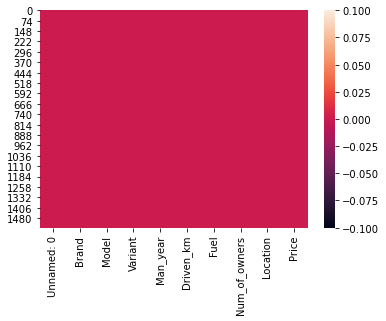

In [7]:
#plotting heatmao for null values 
sns.heatmap(df.isnull())

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

Dropped Unnamed columns as it is not adding any value to the model building.

In [9]:
df['Driven_km']= df['Driven_km'].str.replace('Kms', '')

In [10]:
df['Driven_km'].value_counts()

-              164
44,000          12
50,000          11
72,000          10
66,000           9
              ... 
43,955           1
1,72,942         1
87,800           1
1,46,633 km      1
88,811           1
Name: Driven_km, Length: 865, dtype: int64

In [11]:
df['Driven_km']= df['Driven_km'].str.replace('-', 'NA')

In [12]:
df['Driven_km'].value_counts()

NA             164
44,000          12
50,000          11
72,000          10
75,000           9
              ... 
1,72,942         1
25,879           1
1,46,633 km      1
8,000            1
88,811           1
Name: Driven_km, Length: 865, dtype: int64

In [13]:
df['Price'].value_counts()

-               164
3.75 Lakh        16
2.75 Lakh        14
₹ 6.75 Lakh      13
3.25 Lakh        12
               ... 
₹ 8.02 Lakh       1
₹ 4.81 Lakh       1
₹ 5.06 Lakh       1
₹ 48.5 Lakh       1
₹ 23.38 Lakh      1
Name: Price, Length: 651, dtype: int64

In [14]:
df['Price']= df['Price'].str.replace('₹', '')

In [15]:
df['Price'].value_counts()

-              164
3.75 Lakh       16
2.75 Lakh       14
 6.75 Lakh      13
3.25 Lakh       12
              ... 
 5.17 Lakh       1
 13.65 Lakh      1
 5.66 Lakh       1
 14.06 Lakh      1
 31 Lakh         1
Name: Price, Length: 651, dtype: int64

In [16]:
#Price is having str object along with int so convering it in meaningfull column.

In [17]:
def isfloat(value):
    try:
        float(value)
        return float(value)
    except ValueError:
        return value

In [18]:
df['Price']=df['Price'].apply(isfloat)

In [19]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if x.isdigit():
        x=float(x)
        return float(x)
    if 'Lakh' in x:
        if len(x) > 1:
            return float(x.replace(' Lakh','')) *100000
        return 100000.0
    if 'Crore' in x:
        if len(x) > 1:
            return float(x.replace(' Crore','')) * 10000000
        return 10000000.0

In [20]:
df['Price']=df['Price'].apply(value_to_float)

In [21]:
df['Price']#converted categorical column to float

0        666000.0
1       1385000.0
2       1550000.0
3        185000.0
4        455000.0
          ...    
1544     619000.0
1545     713000.0
1546     353000.0
1547     711000.0
1548     350000.0
Name: Price, Length: 1549, dtype: float64

In [22]:
#taking unique values present in each columns.
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ":", df[i].nunique())

Brand : 27
Model : 138
Variant : 455
Man_year : 117
Driven_km : 865
Fuel : 6
Num_of_owners : 5
Location : 9


In [23]:
df['Man_year'].nunique()

117

In [24]:
df['Man_year'].value_counts()

-           164
2016        115
2018        104
2015         84
2017         79
           ... 
Jul 2013      1
Apr 2015      1
Aug 2019      1
Oct 2011      1
Aug 2016      1
Name: Man_year, Length: 117, dtype: int64

In [25]:
df.describe(include='all')

Brand Model Variant Man_year Driven_km    Fuel Num_of_owners  \
count            1549  1549    1549     1549      1549    1549          1549   
unique             27   138     455      117       865       6             5   
top     Maruti Suzuki     -       -        -        NA  Petrol         First   
freq              442   164     164      164       164     928          1071   
mean              NaN   NaN     NaN      NaN       NaN     NaN           NaN   
std               NaN   NaN     NaN      NaN       NaN     NaN           NaN   
min               NaN   NaN     NaN      NaN       NaN     NaN           NaN   
25%               NaN   NaN     NaN      NaN       NaN     NaN           NaN   
50%               NaN   NaN     NaN      NaN       NaN     NaN           NaN   
75%               NaN   NaN     NaN      NaN       NaN     NaN           NaN   
max               NaN   NaN     NaN      NaN       NaN     NaN           NaN   

         Location         Price  
count        1549  1.385000e+03  
unique          9           NaN  
top     Bangalore           NaN  
freq          396           NaN  
mean          NaN  1.011945e+06  
std           NaN  1.162262e+06  
min           NaN  1.050000e+05  
25%           NaN  4.200000e+05  
50%           NaN  6.000000e+05  
75%           NaN  1.050000e+06  
max           NaN  8.985000e+06

In [26]:
df['Man_year']

0           2018
1           2020
2           2015
3           2008
4           2013
          ...   
1544    Jun 2016
1545    Jun 2016
1546    Jun 2018
1547    Jun 2017
1548    Jun 2017
Name: Man_year, Length: 1549, dtype: object

In [27]:
df['Man_year'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df['Man_year'].value_counts()

2016    199
2018    199
        164
2017    155
2019    137
2015    133
2014    115
2012     99
2020     82
2013     75
2011     67
2021     54
2010     40
2009     11
2007      8
2008      7
1990      2
2022      2
Name: Man_year, dtype: int64

In [28]:
df['Num_of_owners'].value_counts()

First               1071
Second               289
-                    164
Third                 21
UnRegistered Car       4
Name: Num_of_owners, dtype: int64

In [29]:
df['Fuel'] = df['Fuel'].str.replace('-', 'NA') #replacing - with NA
df['Num_of_owners'] = df['Num_of_owners'].str.replace('-', 'NA') #replacing - with NA
df['Num_of_owners'] = df['Num_of_owners'].str.replace('First','1') # #replacing First with 1st
df['Num_of_owners'] = df['Num_of_owners'].str.replace('Second','2') #replacing Second with 2nd
df['Num_of_owners'] = df['Num_of_owners'].str.replace('Third','3') #replacing Third with 3rd
df['Num_of_owners'] = df['Num_of_owners'].str.replace('Fourth', '4') #replacing Fourth with 4th
df['Num_of_owners'] = df['Num_of_owners'].str.replace('UnRegistered Car', '5')

In [30]:
df

Brand    Model                            Variant Man_year  \
0             Honda     WR-V                        S MT Petrol     2018   
1           Hyundai    Verna                    1.6 CRDI SX (O)     2020   
2              Audi       A4             35 TDI Premium Sunroof     2015   
3             Skoda  Octavia                   Ambiente 1.9 TDi     2008   
4             Honda     Brio                              VX AT     2013   
...             ...      ...                                ...      ...   
1544  Maruti Suzuki   Baleno                           Zeta 1.2     2016   
1545     Volkswagen    Vento  Highline Plus 1.2 (P) AT 16 Alloy     2016   
1546        Hyundai      Eon                            Magna +     2018   
1547  Maruti Suzuki   Baleno                       Alpha 1.2 AT     2017   
1548        Hyundai      Eon                              Era +     2017   

      Driven_km    Fuel Num_of_owners Location      Price  
0       25,135   Petrol             1   Mumbai   666000.0  
1       25,685   Diesel             1   Mumbai  1385000.0  
2       70,156   Diesel             2   Mumbai  1550000.0  
3       85,700   Diesel             1   Mumbai   185000.0  
4       33,000   Petrol             1   Mumbai   455000.0  
...         ...     ...           ...      ...        ...  
1544  37,783 km  Petrol             1  Chennai   619000.0  
1545  67,694 km  Petrol             1  Chennai   713000.0  
1546  31,501 km  Petrol             1  Chennai   353000.0  
1547  23,136 km  Petrol             2  Chennai   711000.0  
1548   7,416 km  Petrol             2  Chennai   350000.0  

[1549 rows x 9 columns]

In [31]:
df['Fuel'].value_counts()

Petrol    928
Diesel    423
NA        164
CNG        29
Hybrid      3
LPG         2
Name: Fuel, dtype: int64

In [32]:
df['Fuel'] = df['Fuel'].str.replace('-', 'NA') #replacing - with NA
df['Fuel'] = df['Fuel'].str.replace('Petrol', '1') #replacing - with 1
df['Fuel'] = df['Fuel'].str.replace('Diesel','2') # #replacing Diesel with 2
df['Fuel'] = df['Fuel'].str.replace('CNG','3') #replacing CNG with 3
df['Fuel'] = df['Fuel'].str.replace('Hybrid','4') #replacing Hybrid with 4
df['Fuel'] = df['Fuel'].str.replace('LPG', '5') #replacing LPG with 5

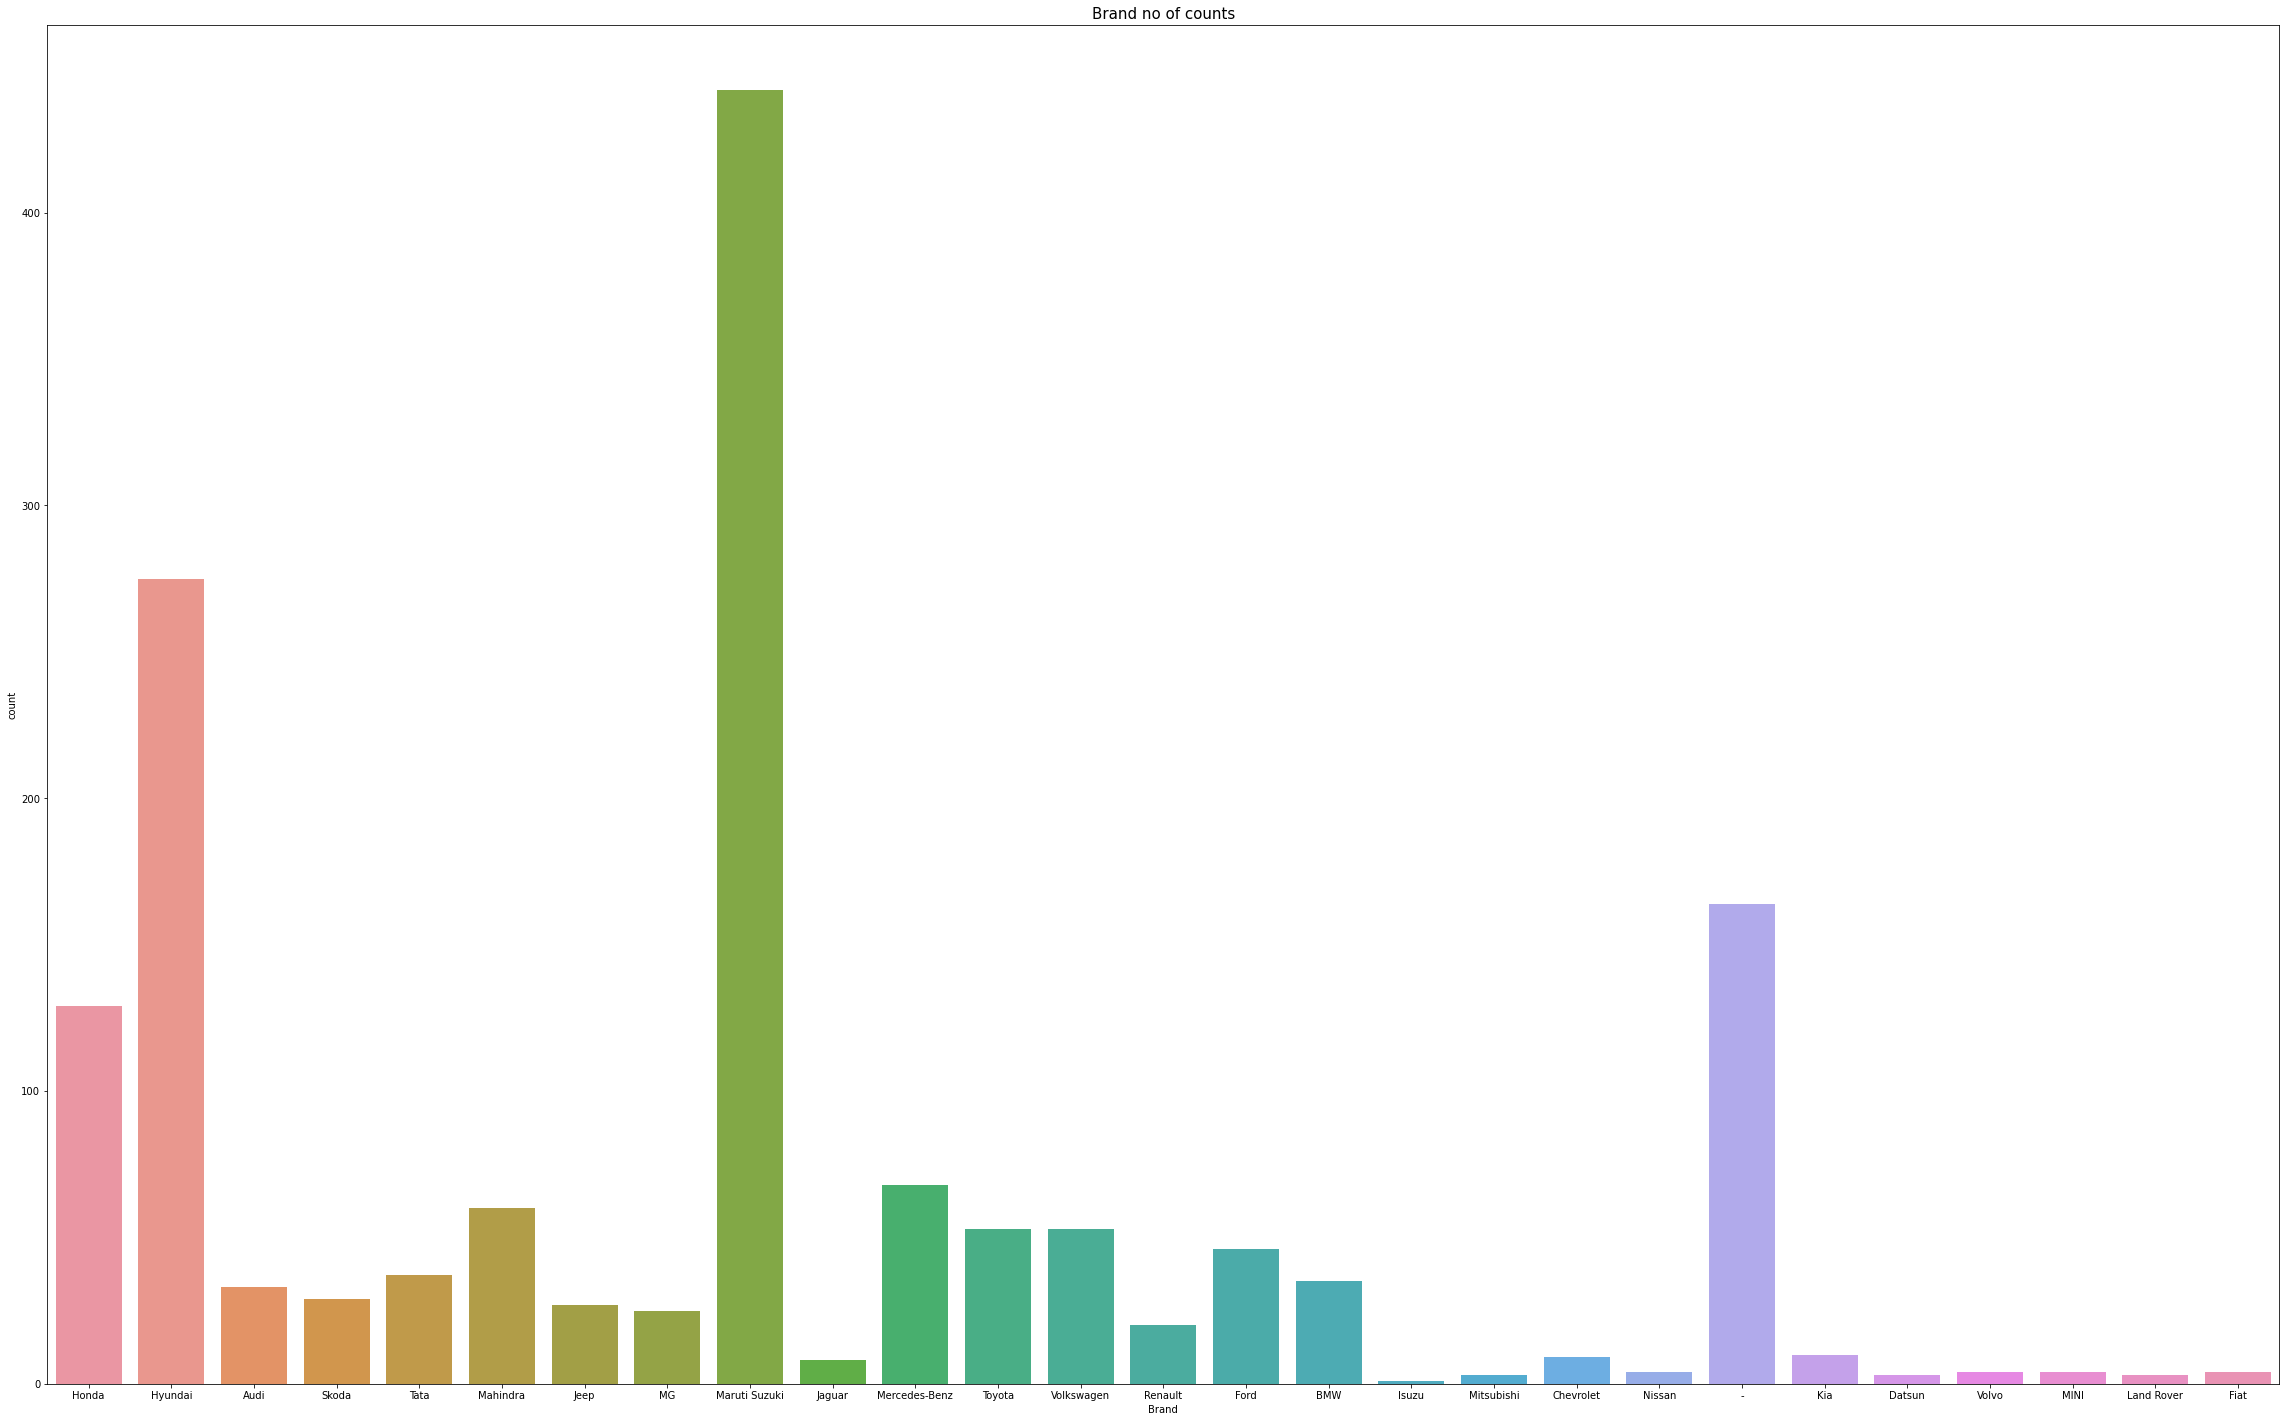

In [33]:
def value_count(df,col):
    plt.figure(figsize=(40,25))
    plt.title(col+' no of counts',fontsize=15)
    plt.style.use('fivethirtyeight')
    sns.countplot(df[col], data=df,)
value_count(df,'Brand')

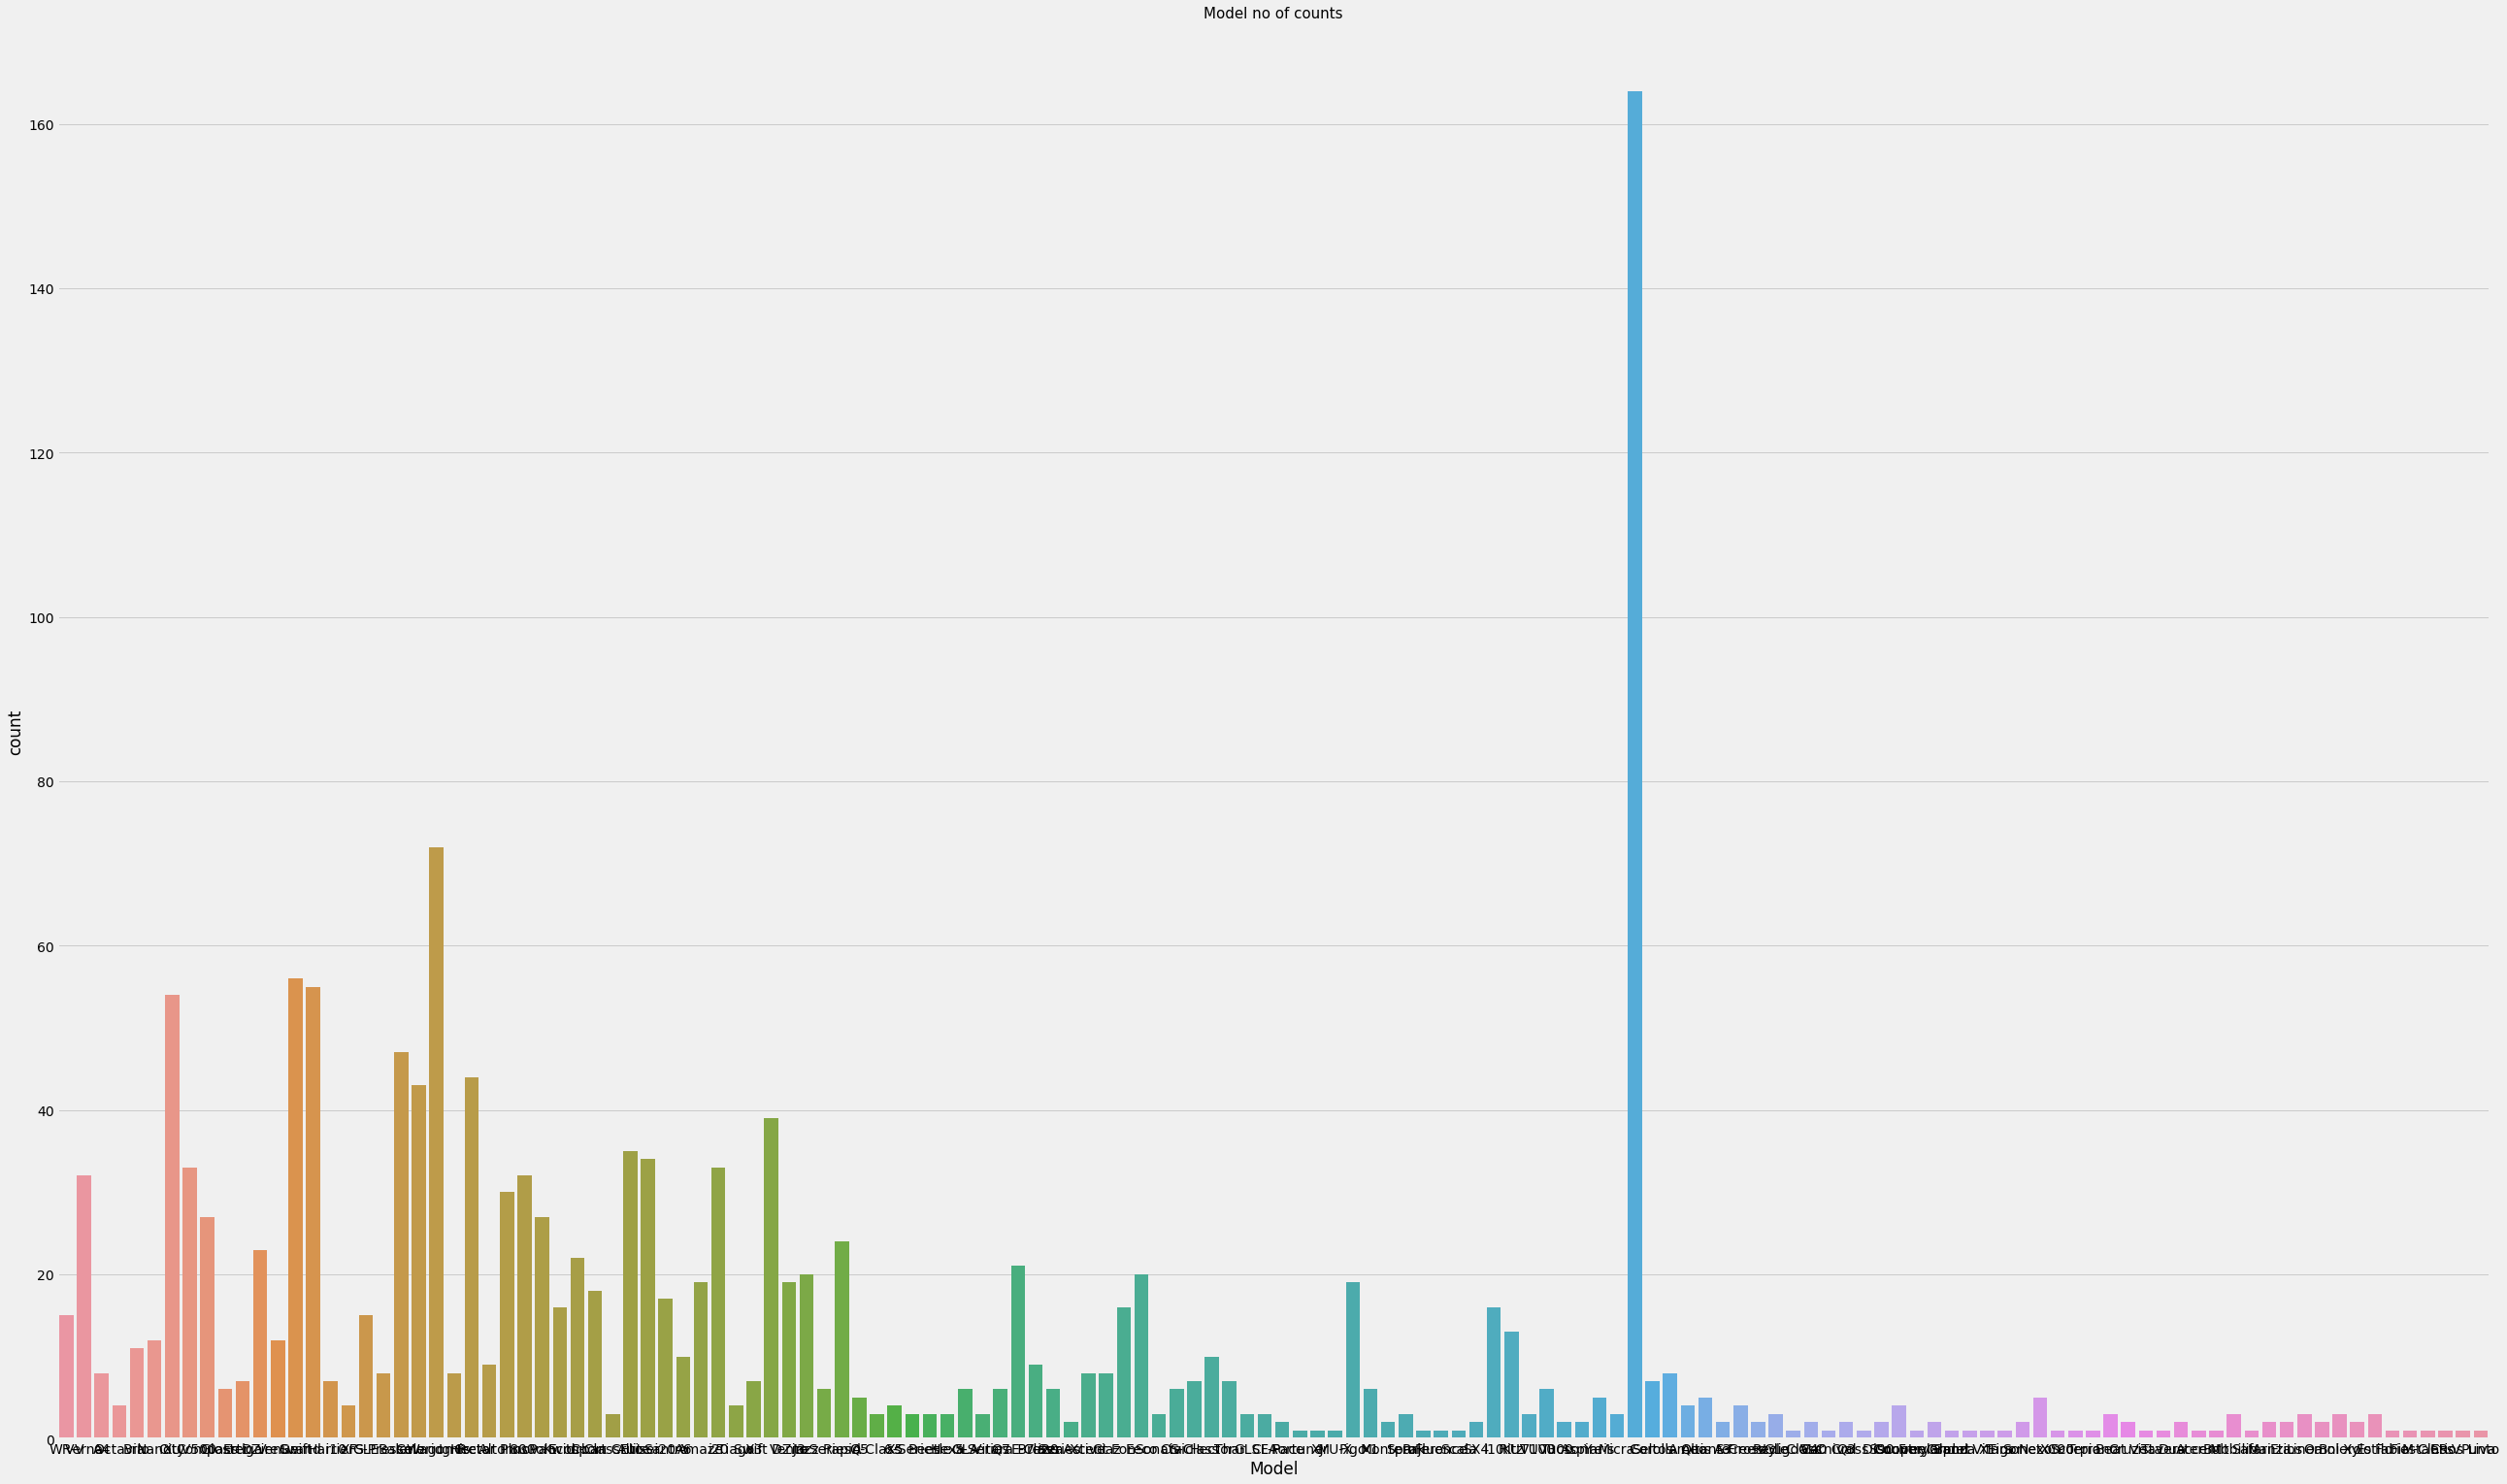

In [34]:
value_count(df,'Model')

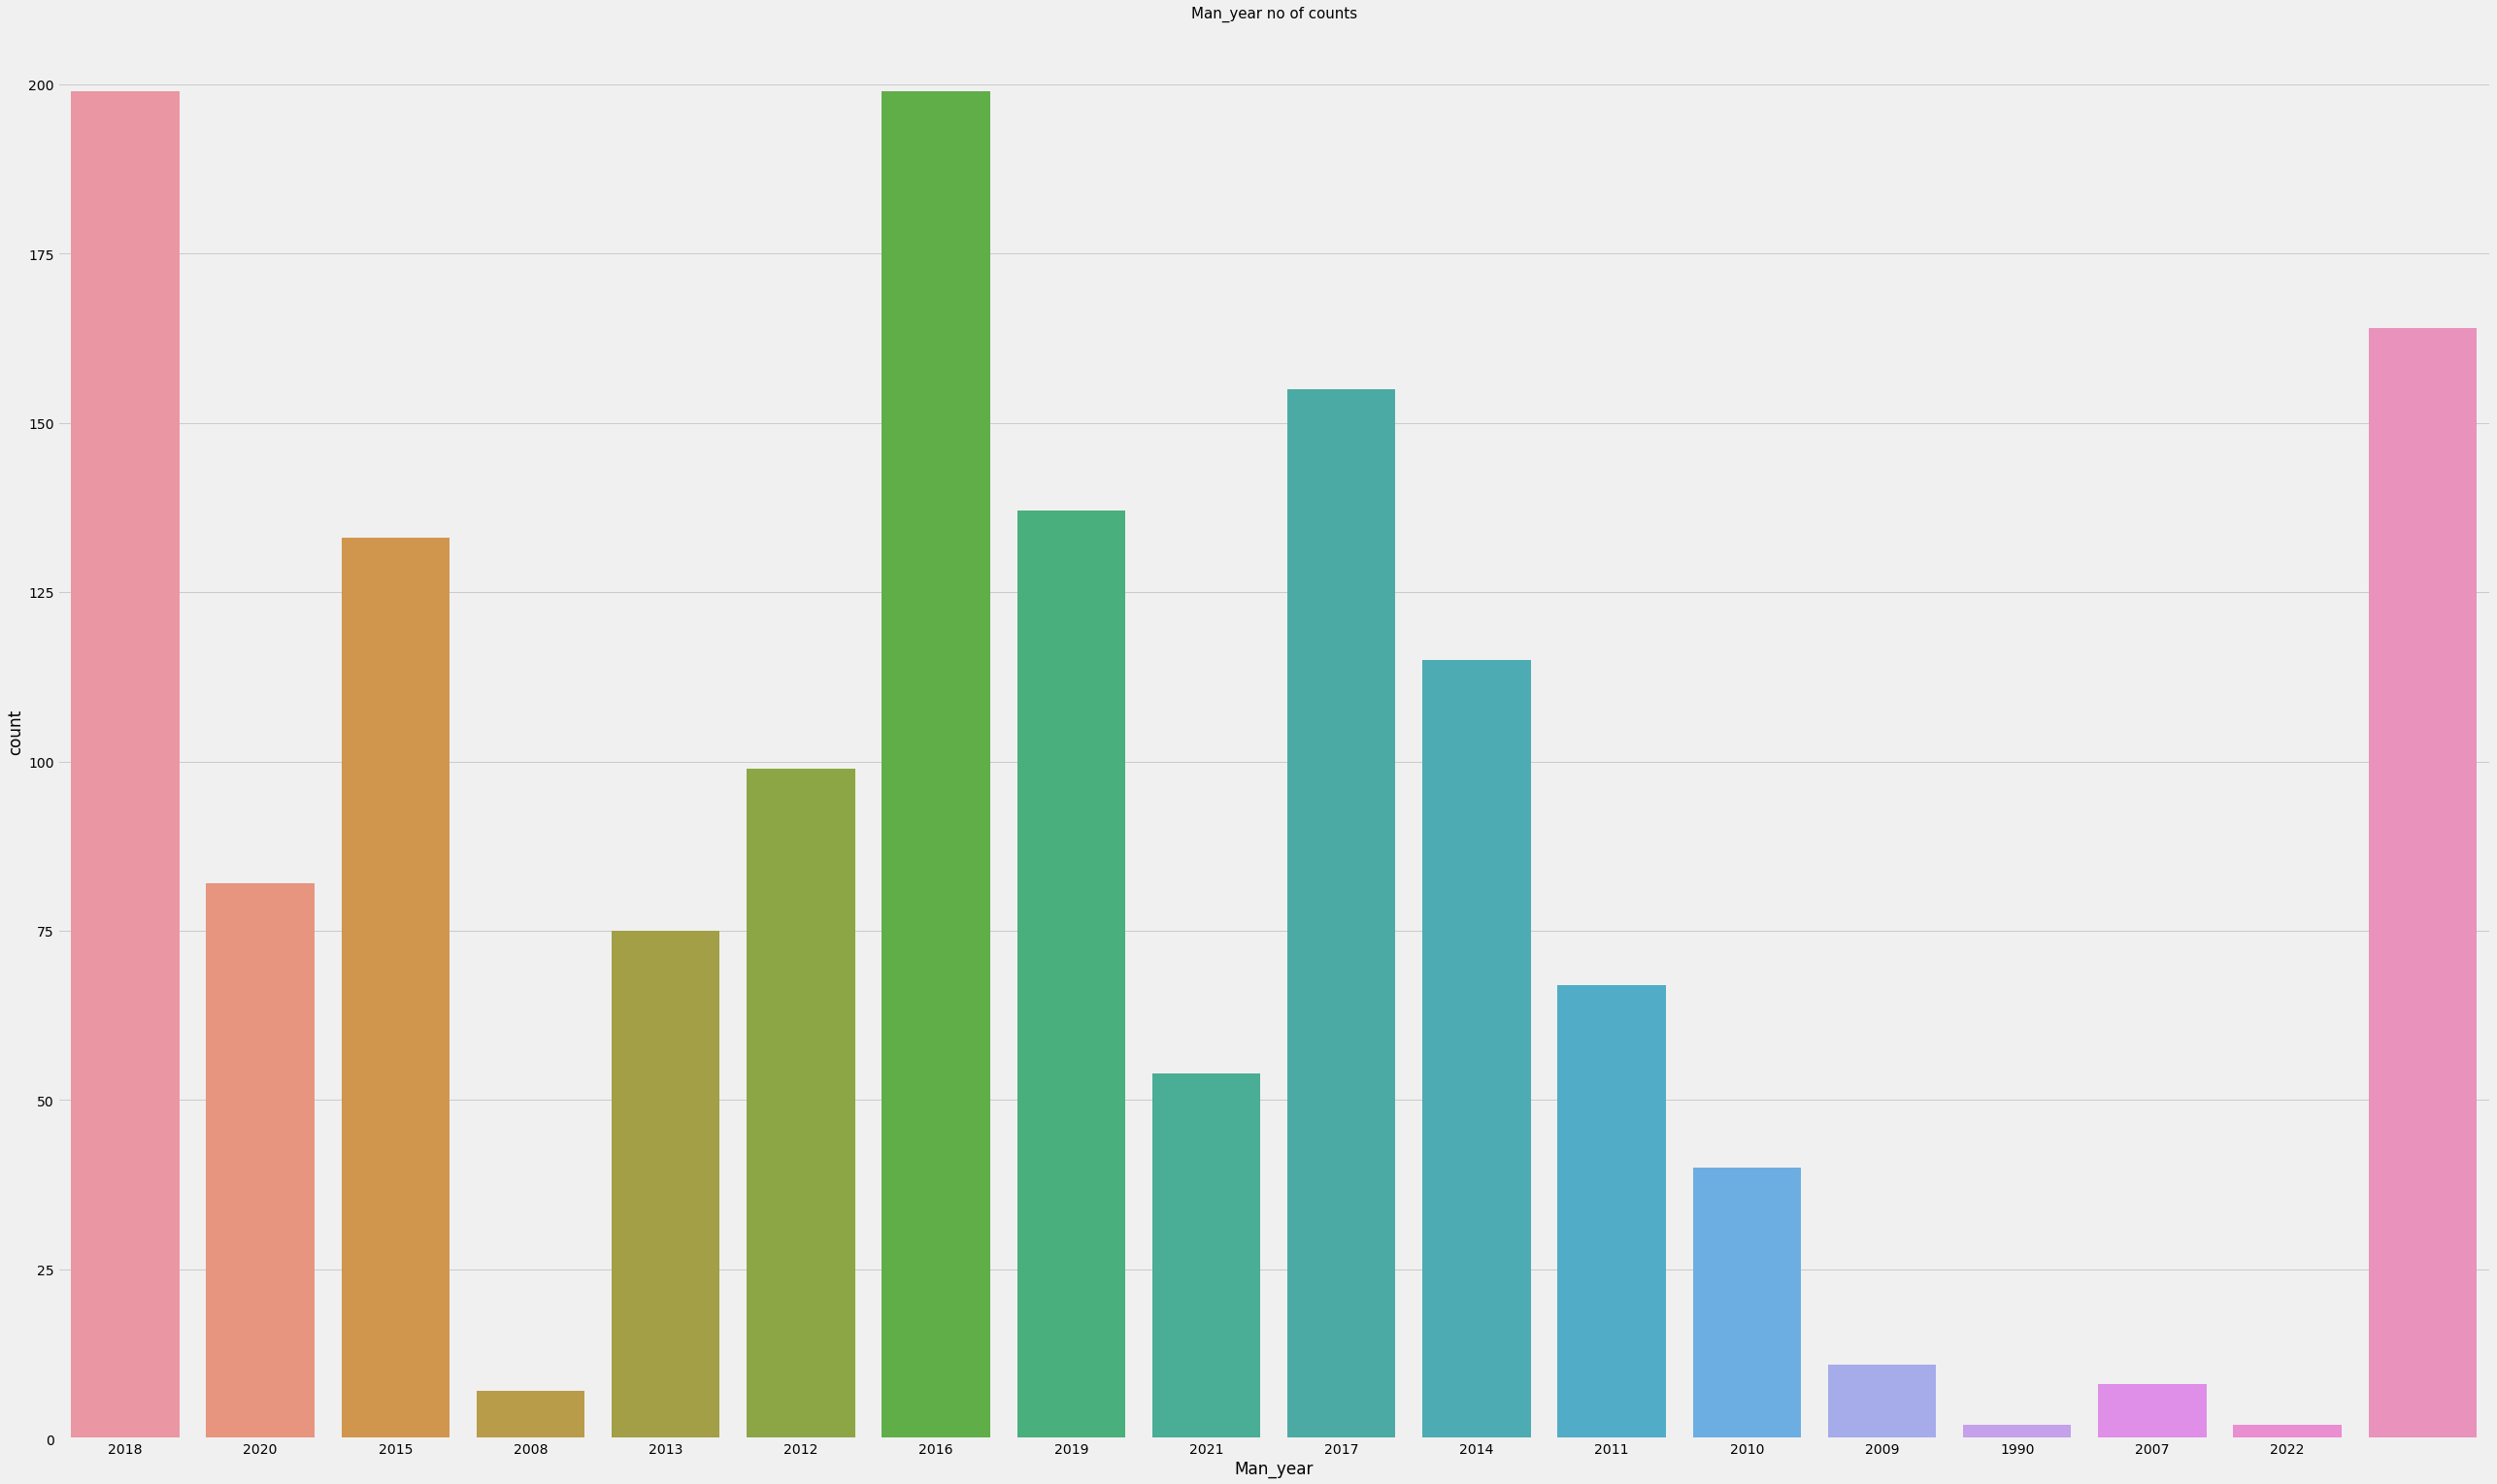

In [35]:
value_count(df,'Man_year')

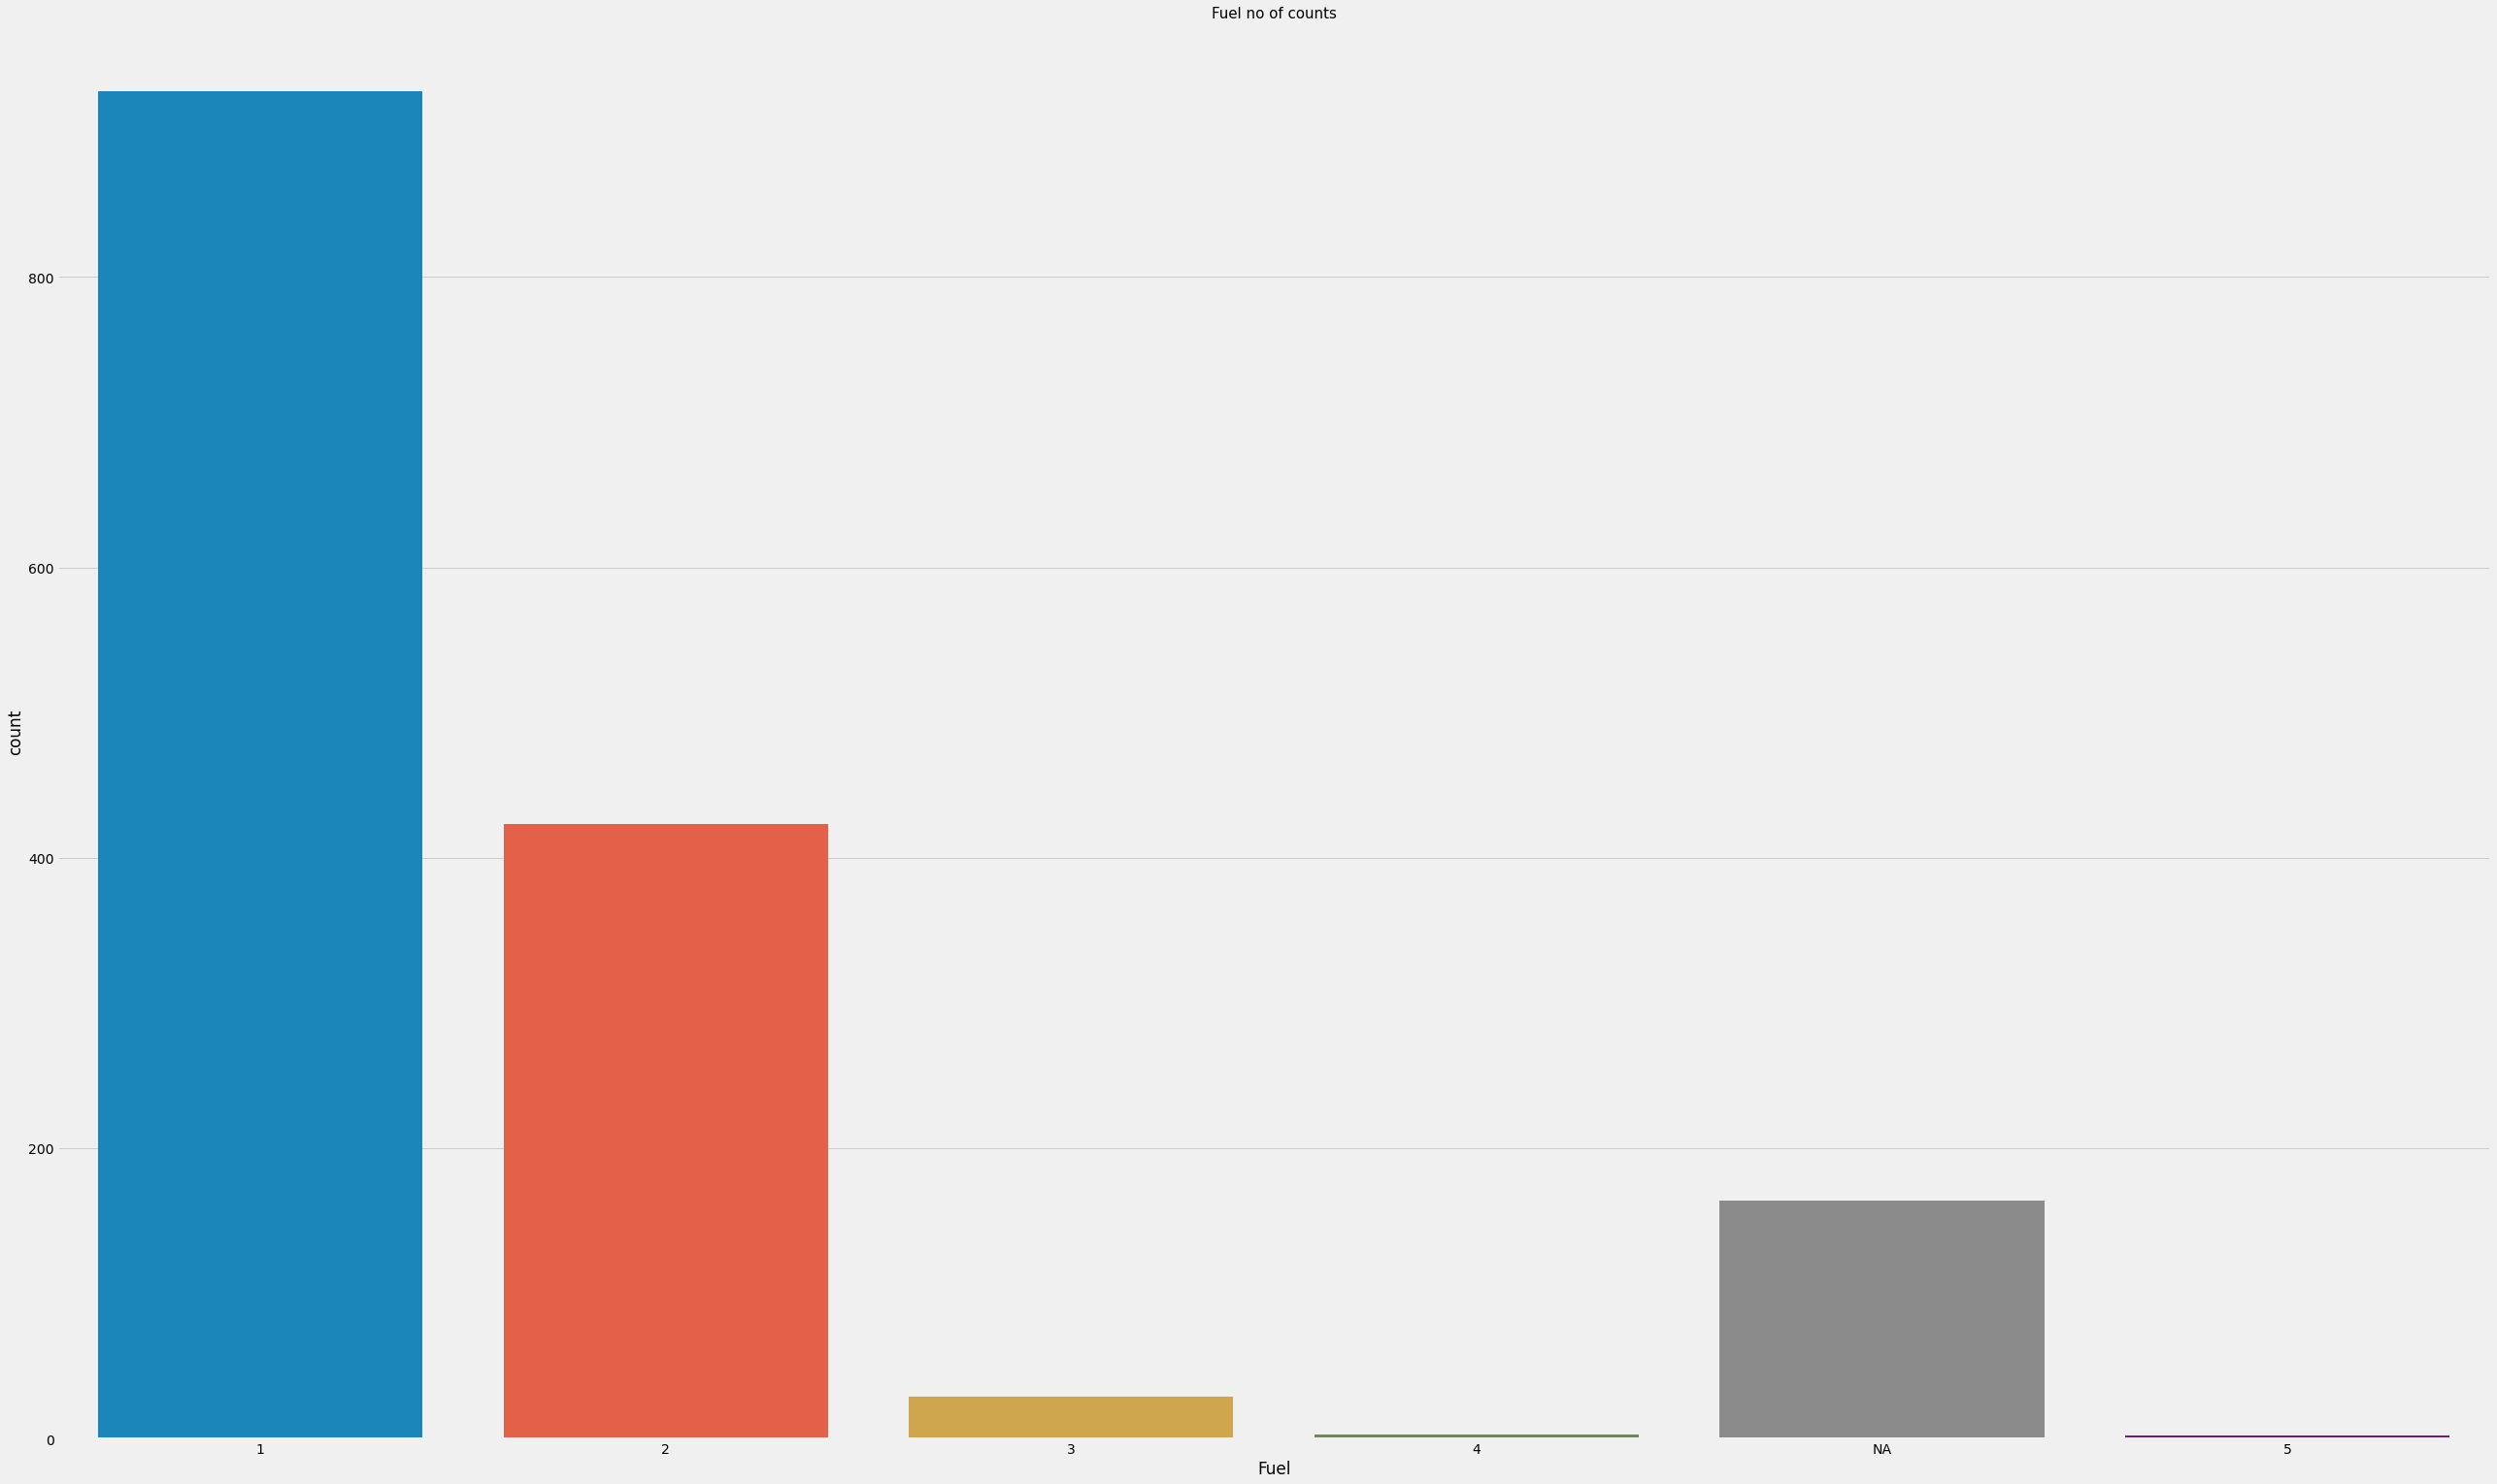

In [36]:
value_count(df,'Fuel')

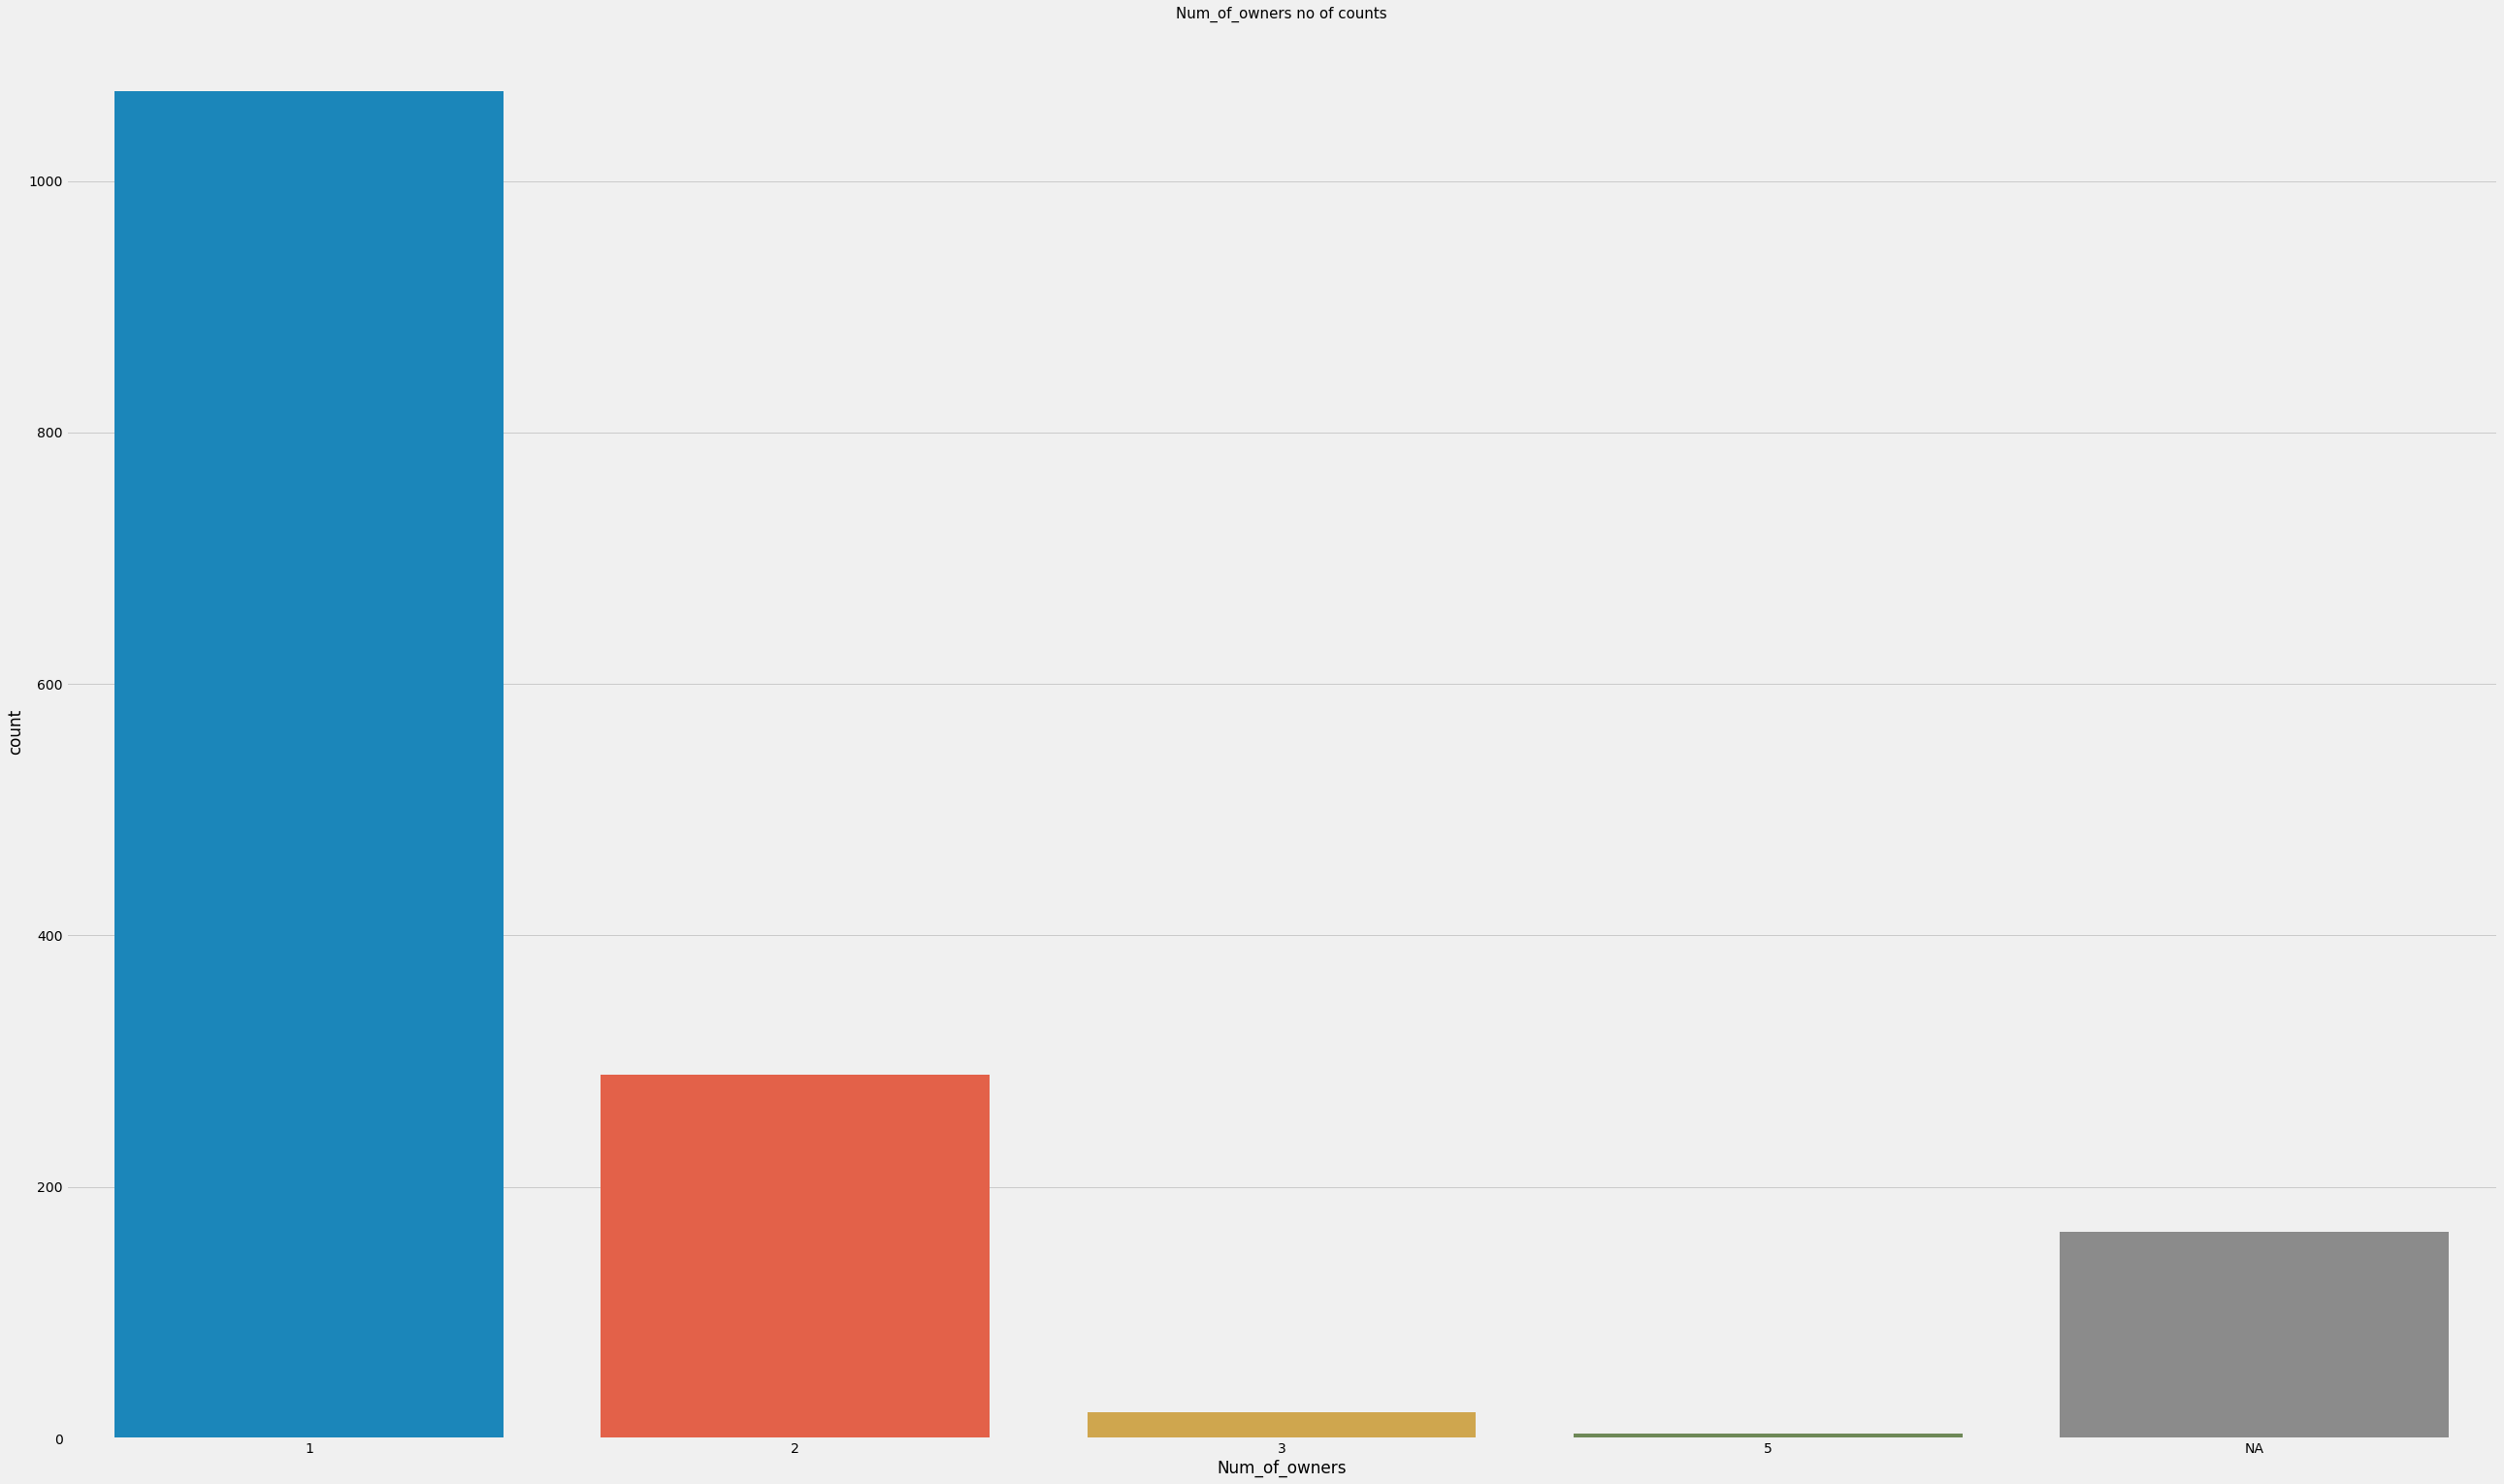

In [37]:
value_count(df,'Num_of_owners')

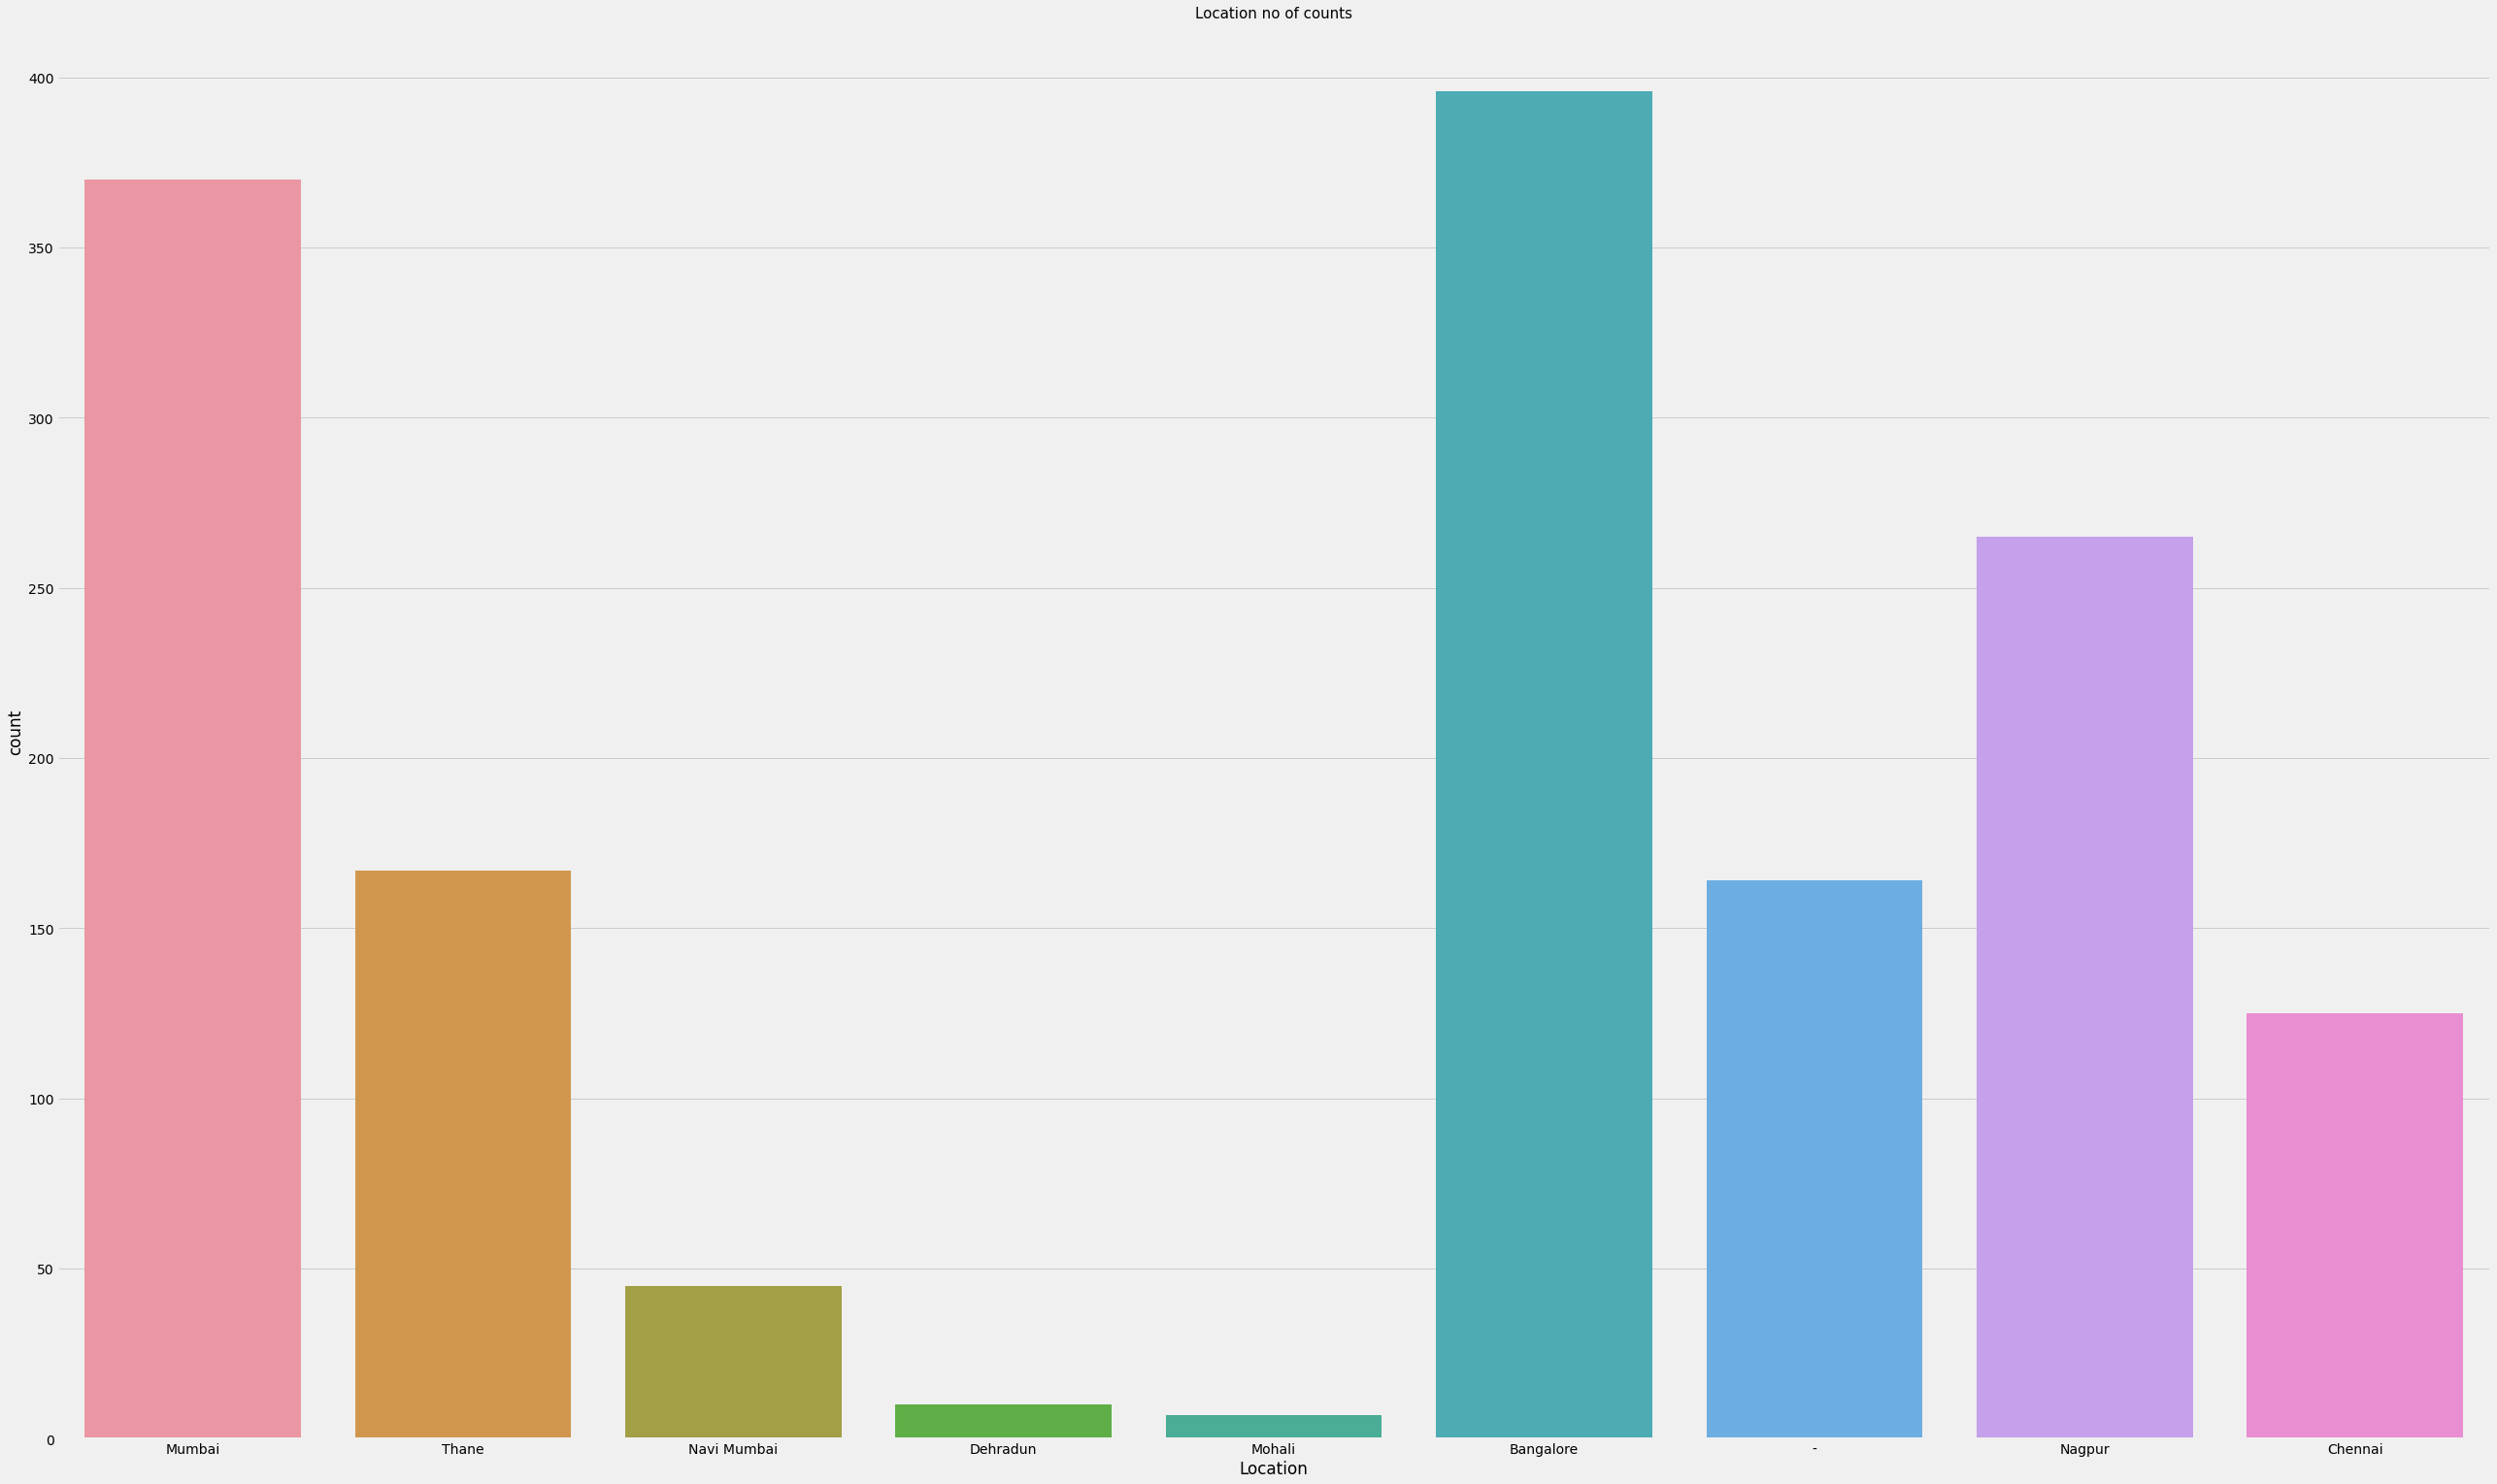

In [38]:
value_count(df,'Location')

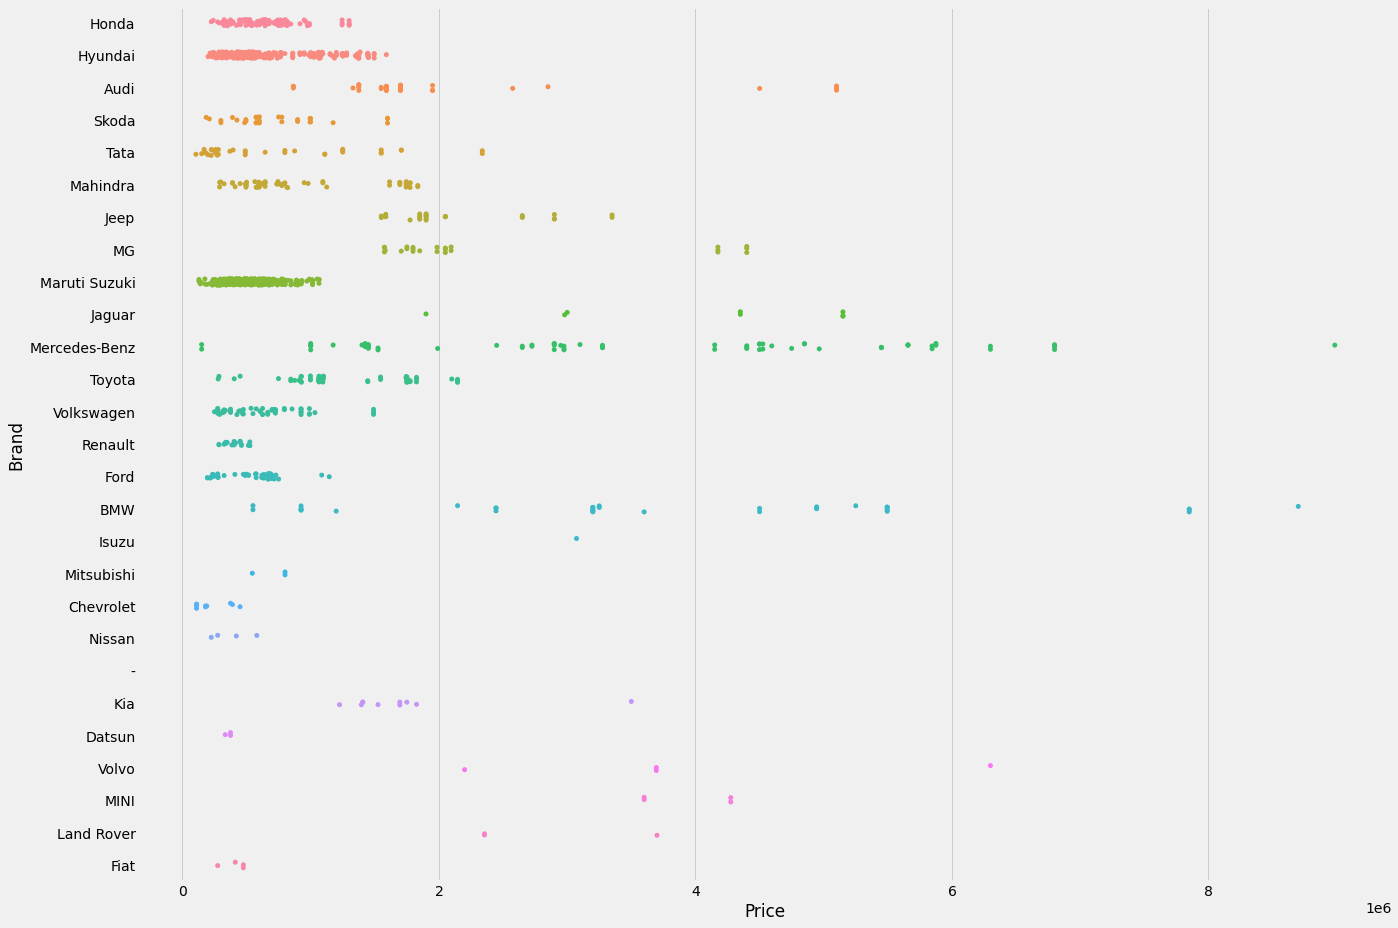

In [39]:
plt.figure(figsize=(20,15))
sns.stripplot(y='Brand',x='Price',data=df)
plt.show()

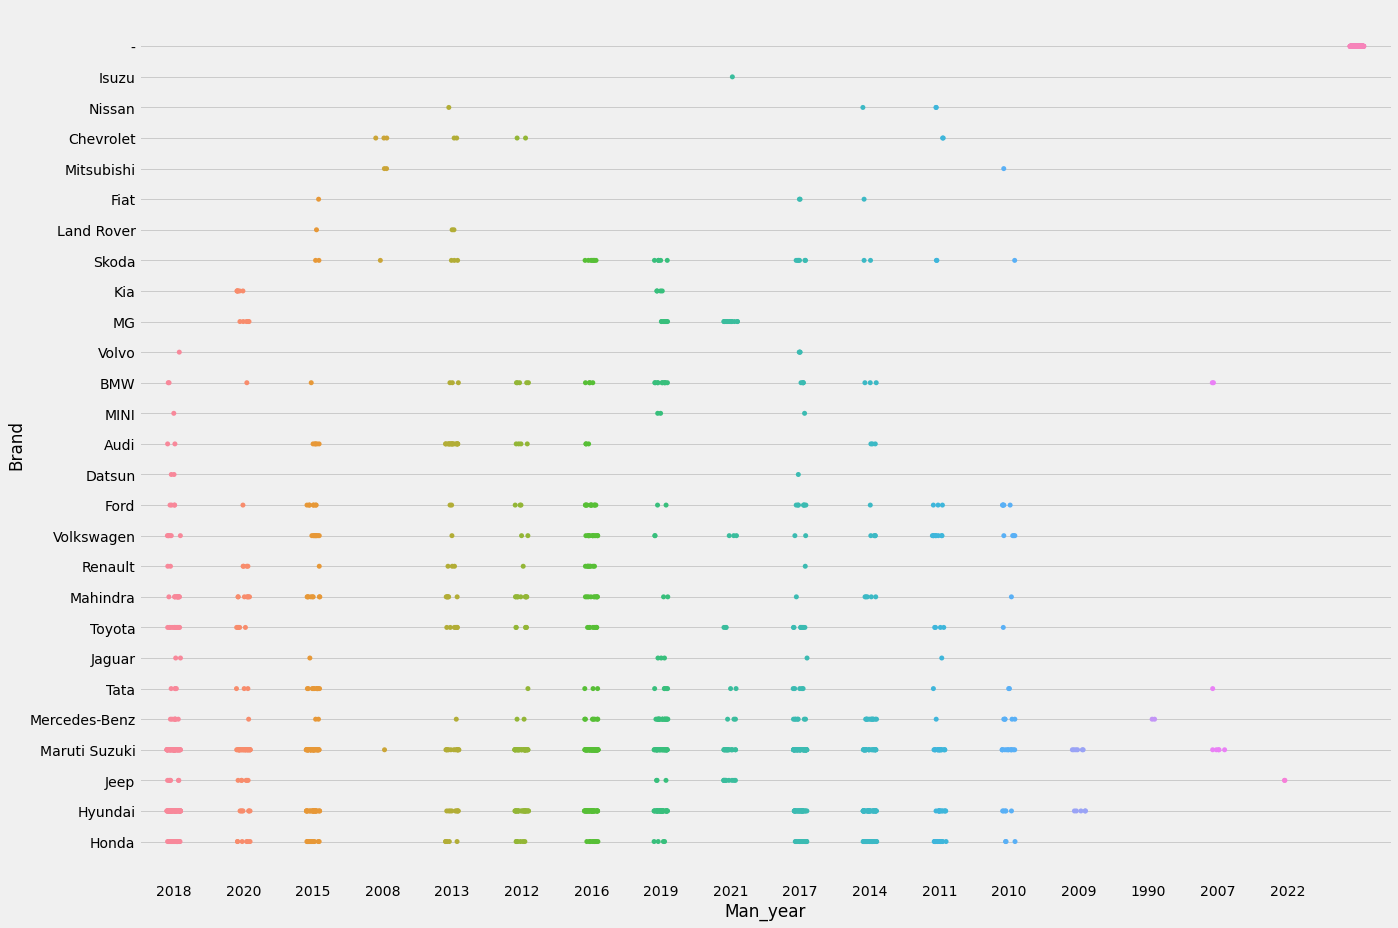

In [40]:
plt.figure(figsize=(20,15))
sns.stripplot(y='Brand',x='Man_year',data=df)
plt.show()

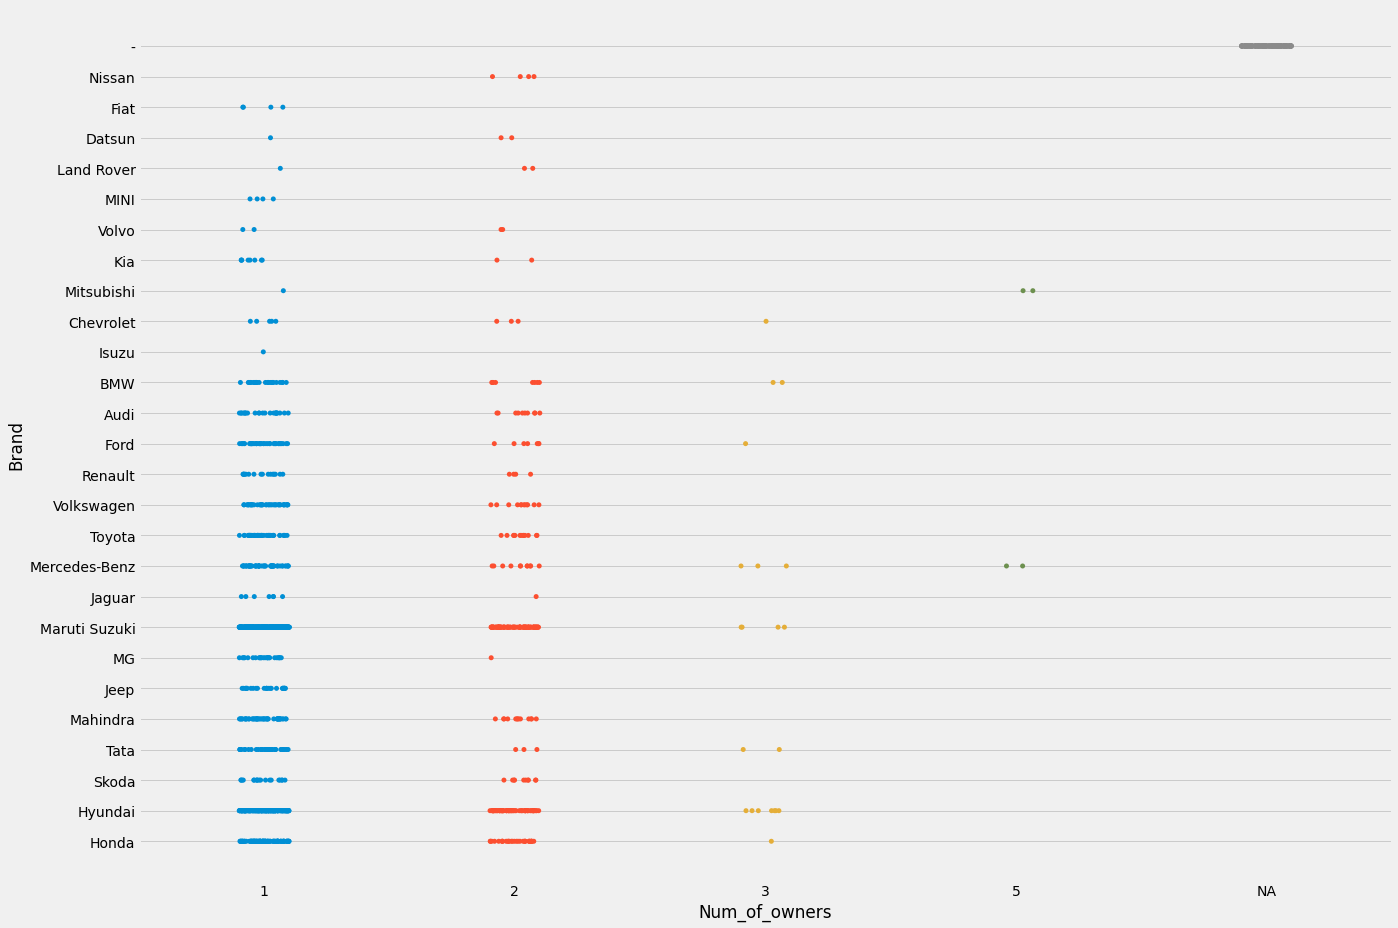

In [41]:
plt.figure(figsize=(20,15))
sns.stripplot(y='Brand',x='Num_of_owners',data=df)
plt.show()

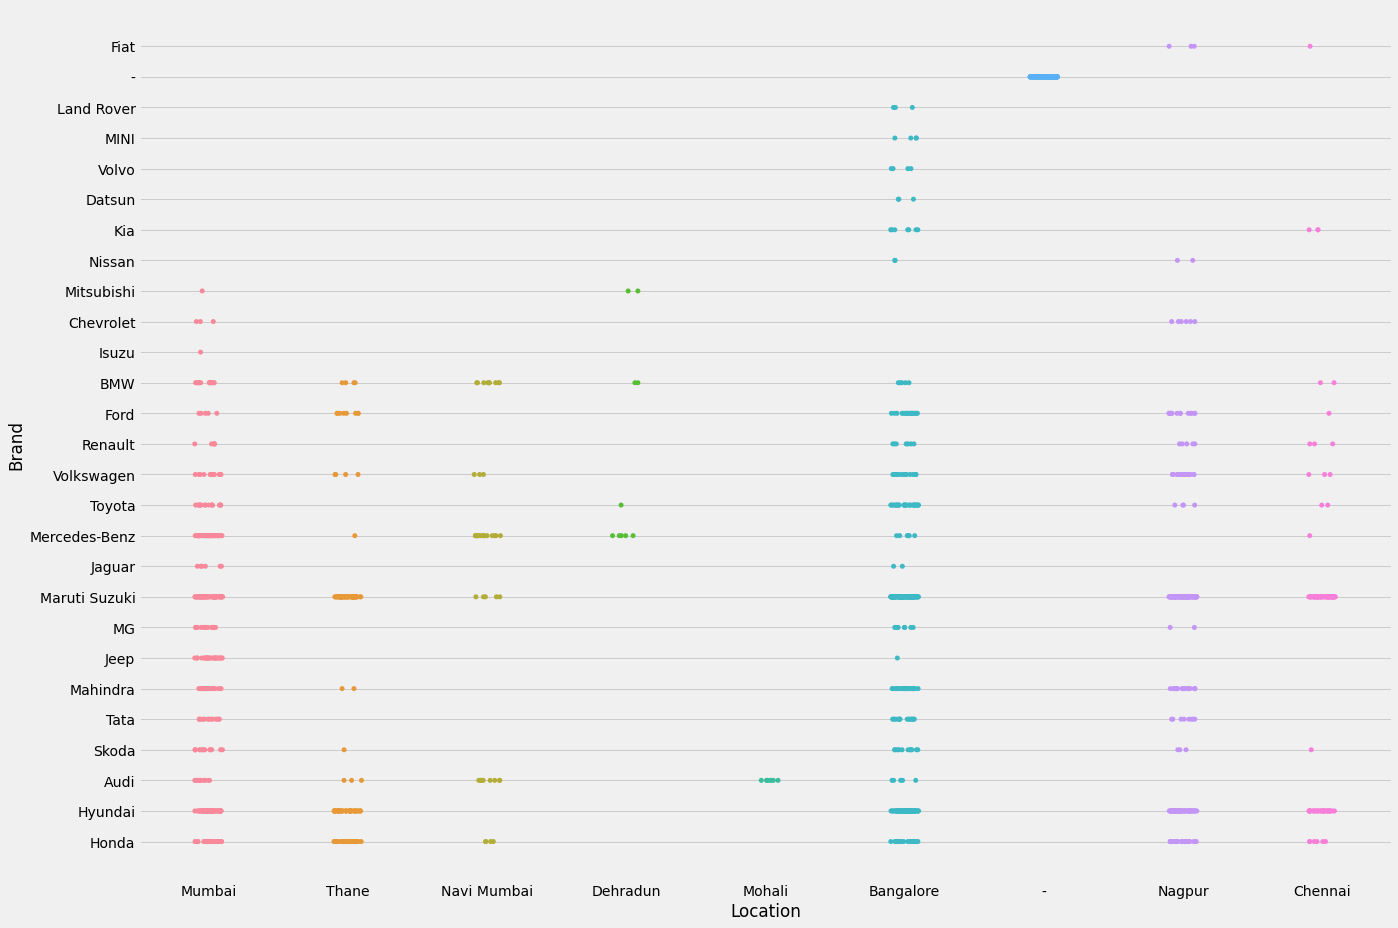

In [42]:
plt.figure(figsize=(20,15))
sns.stripplot(y='Brand',x='Location',data=df)
plt.show()

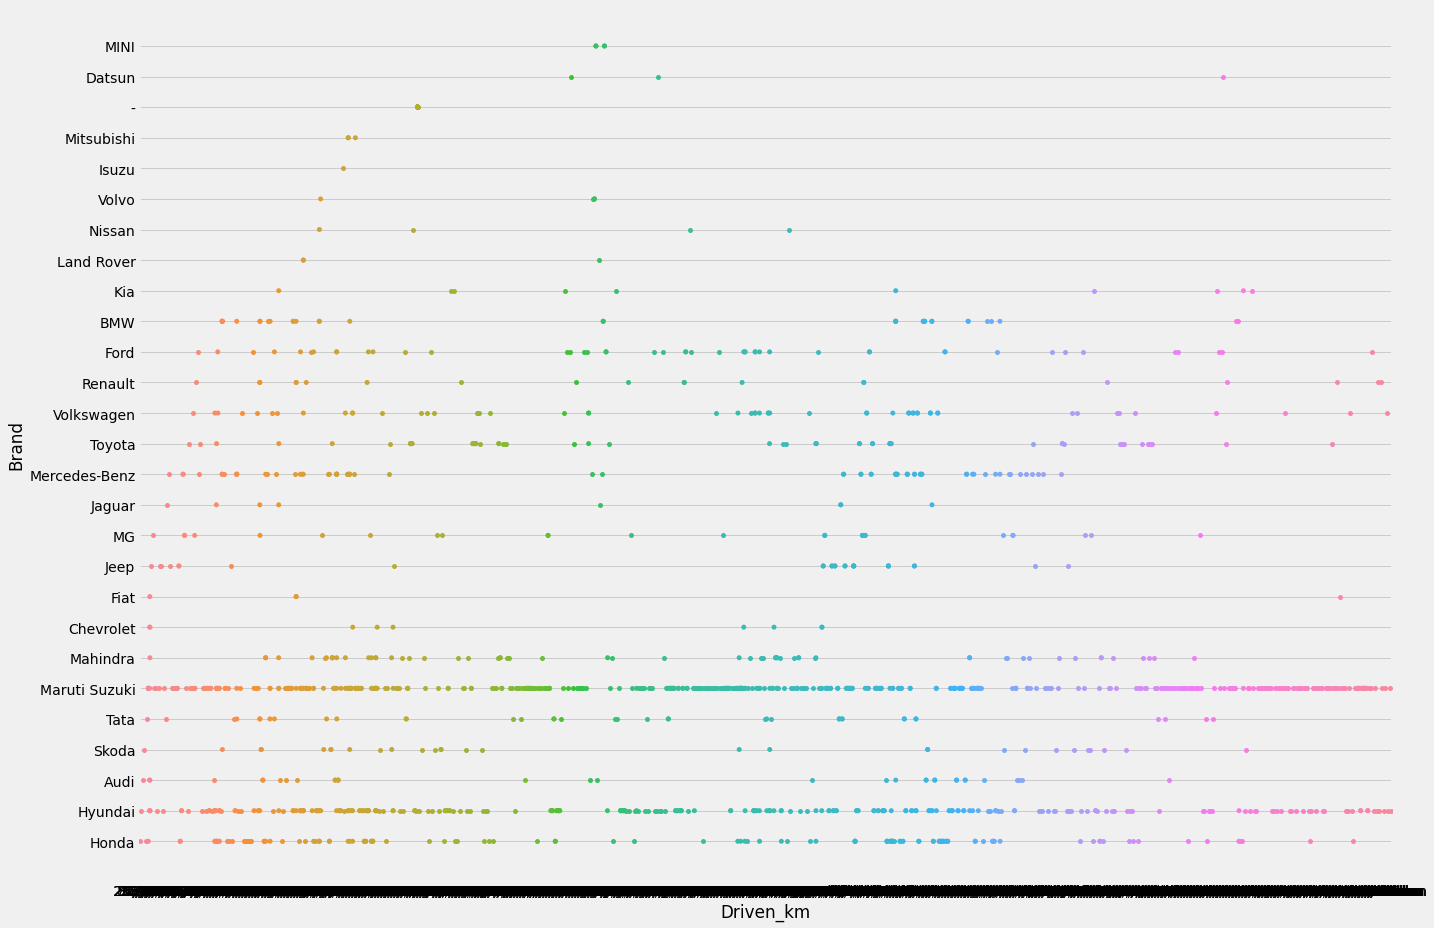

In [43]:
plt.figure(figsize=(20,15))
sns.stripplot(y='Brand',x='Driven_km',data=df)
plt.show()

In [44]:
df.isna().sum()

Brand              0
Model              0
Variant            0
Man_year           0
Driven_km          0
Fuel               0
Num_of_owners      0
Location           0
Price            164
dtype: int64

In [45]:
df['Price'].value_counts()

675000.0     24
375000.0     22
450000.0     20
775000.0     19
475000.0     19
             ..
517000.0      1
885000.0      1
560000.0      1
549000.0      1
3700000.0     1
Name: Price, Length: 431, dtype: int64

In [46]:
df['Price'].fillna(df['Price'].mode()[0],inplace=True)

In [47]:
df

Brand    Model                            Variant Man_year  \
0             Honda     WR-V                        S MT Petrol     2018   
1           Hyundai    Verna                    1.6 CRDI SX (O)     2020   
2              Audi       A4             35 TDI Premium Sunroof     2015   
3             Skoda  Octavia                   Ambiente 1.9 TDi     2008   
4             Honda     Brio                              VX AT     2013   
...             ...      ...                                ...      ...   
1544  Maruti Suzuki   Baleno                           Zeta 1.2     2016   
1545     Volkswagen    Vento  Highline Plus 1.2 (P) AT 16 Alloy     2016   
1546        Hyundai      Eon                            Magna +     2018   
1547  Maruti Suzuki   Baleno                       Alpha 1.2 AT     2017   
1548        Hyundai      Eon                              Era +     2017   

      Driven_km Fuel Num_of_owners Location      Price  
0       25,135     1             1   Mumbai   666000.0  
1       25,685     2             1   Mumbai  1385000.0  
2       70,156     2             2   Mumbai  1550000.0  
3       85,700     2             1   Mumbai   185000.0  
4       33,000     1             1   Mumbai   455000.0  
...         ...  ...           ...      ...        ...  
1544  37,783 km    1             1  Chennai   619000.0  
1545  67,694 km    1             1  Chennai   713000.0  
1546  31,501 km    1             1  Chennai   353000.0  
1547  23,136 km    1             2  Chennai   711000.0  
1548   7,416 km    1             2  Chennai   350000.0  

[1549 rows x 9 columns]

In [48]:
df.isna().sum()

Brand            0
Model            0
Variant          0
Man_year         0
Driven_km        0
Fuel             0
Num_of_owners    0
Location         0
Price            0
dtype: int64

In [49]:
df.corr()

Price
Price    1.0

<AxesSubplot:>

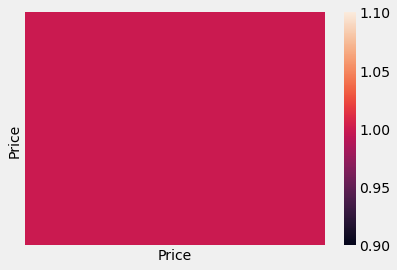

In [50]:
sns.heatmap(df.corr())

# Ordinal Encoding

In [51]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [52]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df.head()

Brand  Model  Variant  Man_year  Driven_km  Fuel  Num_of_owners  Location  \
0    7.0  122.0    269.0      13.0      257.0   0.0            0.0       5.0   
1    8.0  119.0     25.0      15.0      266.0   1.0            0.0       5.0   
2    1.0    7.0     74.0      10.0      752.0   1.0            1.0       5.0   
3   22.0   81.0    100.0       3.0      821.0   1.0            0.0       5.0   
4    7.0   20.0    360.0       8.0      372.0   0.0            0.0       5.0   

       Price  
0   666000.0  
1  1385000.0  
2  1550000.0  
3   185000.0  
4   455000.0

# Correlation Matrix

In [53]:
df.corr()

Brand     Model   Variant  Man_year  Driven_km      Fuel  \
Brand          1.000000  0.361497  0.382900  0.466898  -0.360065 -0.522867   
Model          0.361497  1.000000  0.411243  0.289135  -0.156299 -0.400778   
Variant        0.382900  0.411243  1.000000  0.467902  -0.256094 -0.509943   
Man_year       0.466898  0.289135  0.467902  1.000000  -0.550639 -0.718172   
Driven_km     -0.360065 -0.156299 -0.256094 -0.550639   1.000000  0.487767   
Fuel          -0.522867 -0.400778 -0.509943 -0.718172   0.487767  1.000000   
Num_of_owners -0.540522 -0.409738 -0.489510 -0.792318   0.490007  0.873098   
Location       0.185111  0.229815  0.172094  0.265602  -0.046948 -0.410531   
Price         -0.005826 -0.017711 -0.094101  0.292751  -0.139670  0.021217   

               Num_of_owners  Location     Price  
Brand              -0.540522  0.185111 -0.005826  
Model              -0.409738  0.229815 -0.017711  
Variant            -0.489510  0.172094 -0.094101  
Man_year           -0.792318  0.265602  0.292751  
Driven_km           0.490007 -0.046948 -0.139670  
Fuel                0.873098 -0.410531  0.021217  
Num_of_owners       1.000000 -0.464972 -0.133755  
Location           -0.464972  1.000000  0.039082  
Price              -0.133755  0.039082  1.000000

<AxesSubplot:>

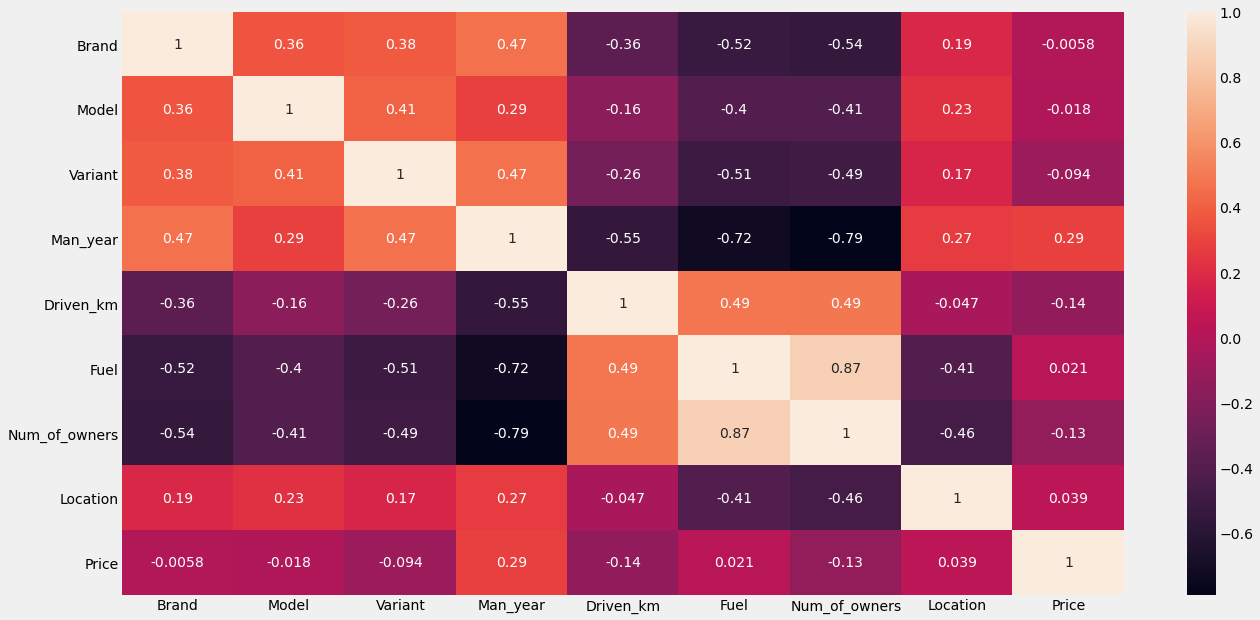

In [54]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Data Distribution

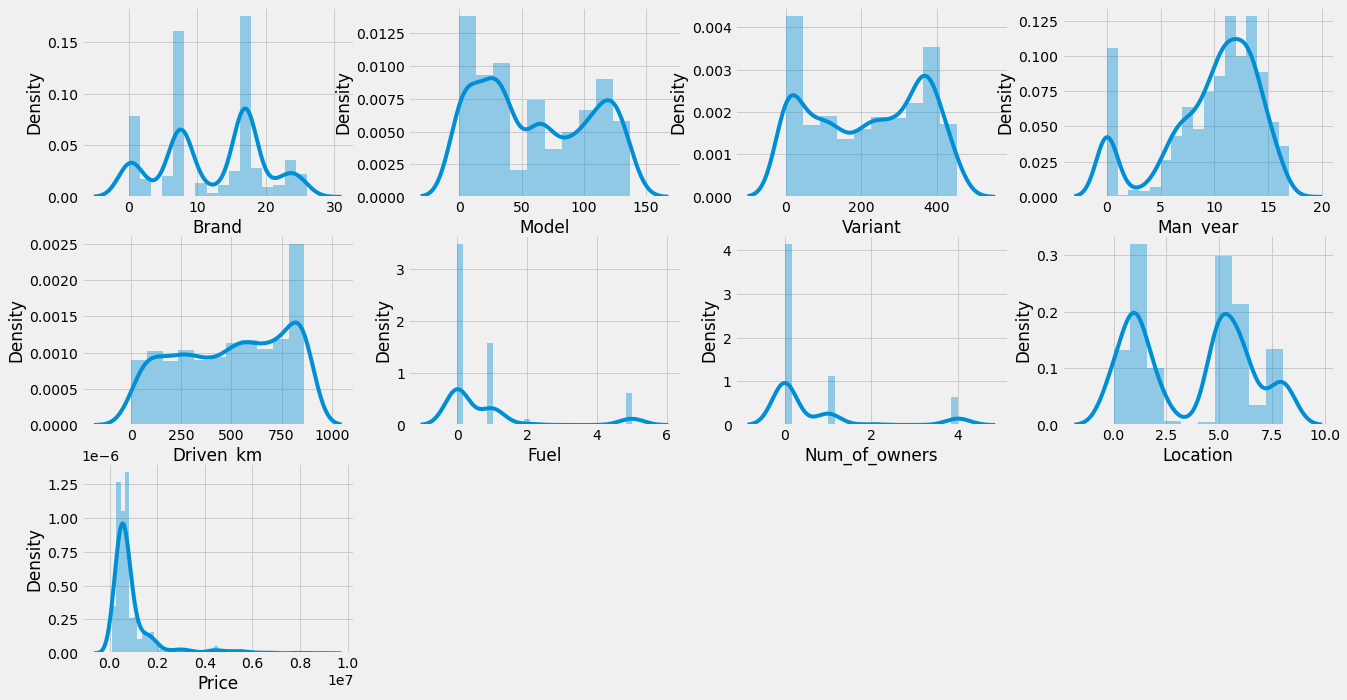

In [55]:
plt.figure(figsize=(20,15))
plot=1
for i in df:
    if plot<=9:
        plt.subplot(4,4,plot)
        sns.distplot(df[i])
        plot=plot+1
plt.show();

# Outlier Detection

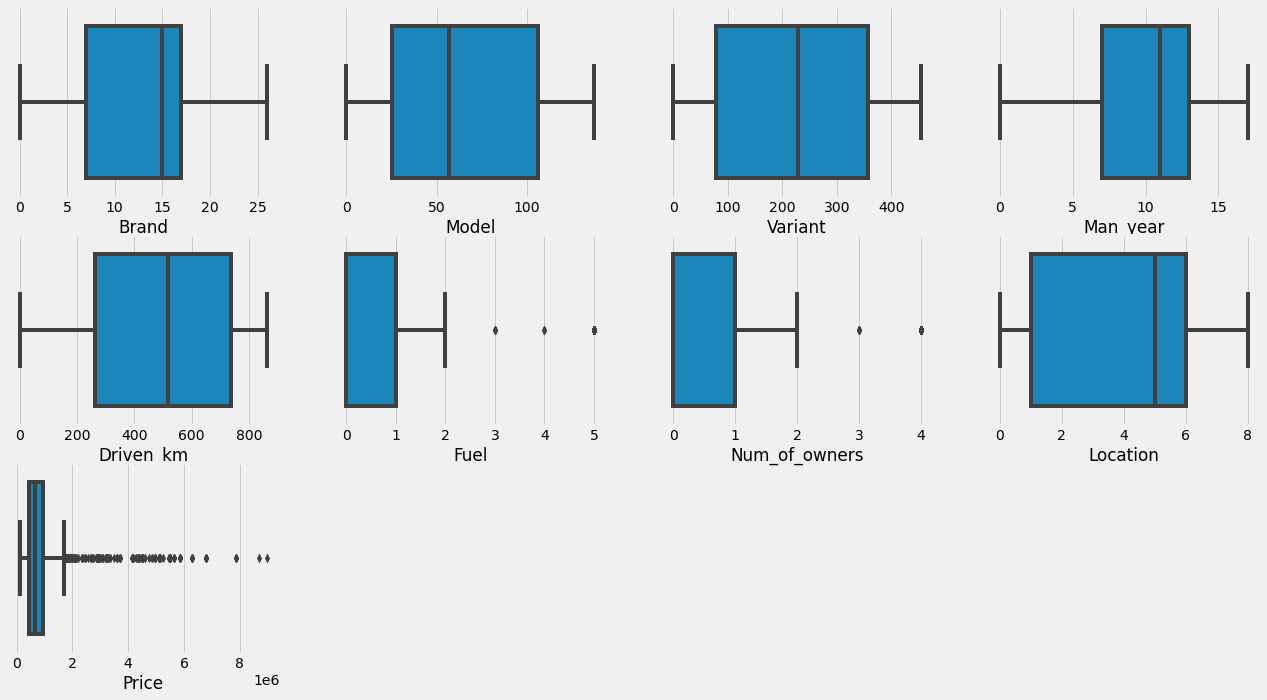

In [56]:
plt.figure(figsize=(20,15))
plot=1
for i in df:
    if plot<=9:
        plt.subplot(4,4,plot)
        sns.boxplot(df[i])
        plot=plot+1
plt.show();

In [57]:
#using zscore to remove ouliers 
from scipy.stats import zscore
z =np.abs(zscore(df))
print(z.shape)
data =df.loc[(z<3).all(axis=1)]
print(data.shape)

(1549, 9)
(1491, 9)


# Skewness:

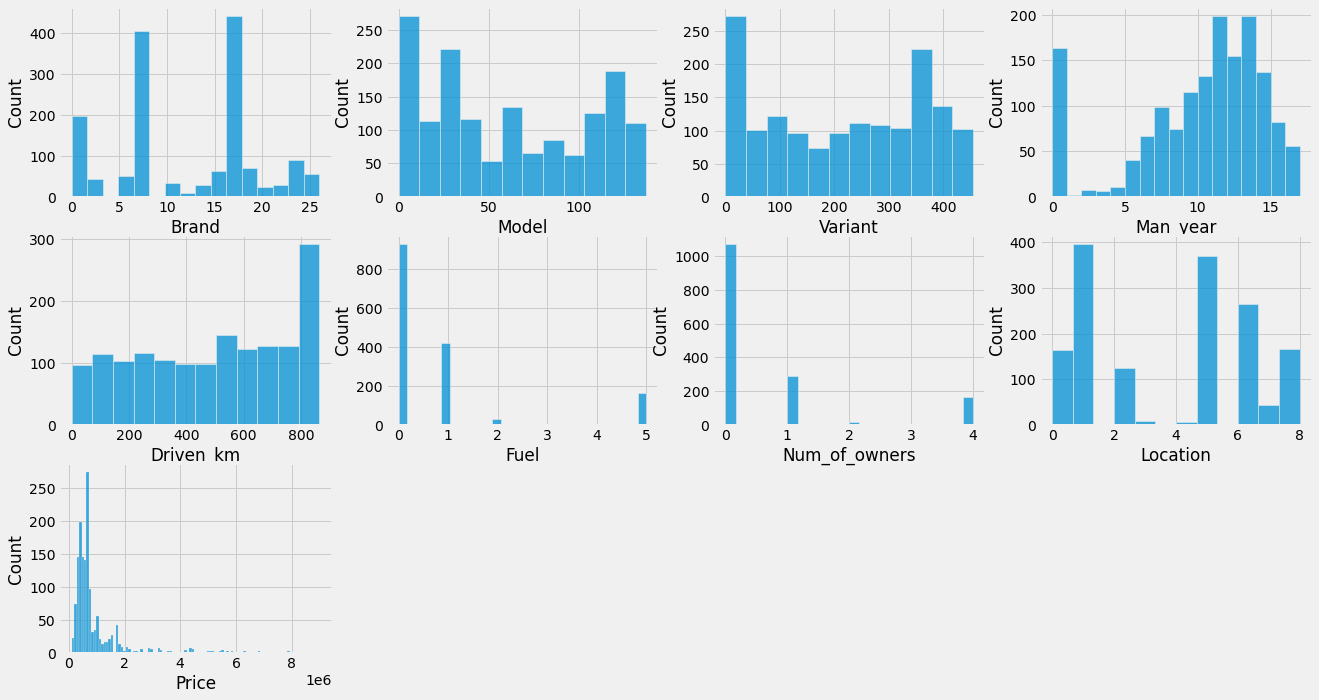

In [58]:
plt.figure(figsize=(20,15))
plot=1
for i in df:
    if plot<=9:
        plt.subplot(4,4,plot)
        sns.histplot(df[i])
        plt.xlabel(i)
        plot=plot+1
plt.show();

In [59]:
df.skew()

Brand           -0.137474
Model            0.205907
Variant         -0.108235
Man_year        -0.926101
Driven_km       -0.191668
Fuel             2.077629
Num_of_owners    2.032692
Location         0.028407
Price            3.348575
dtype: float64

In [60]:
x=df.drop(['Price'],axis=1)
y=df[['Price']]

In [61]:
#Treating skewness.
from sklearn.preprocessing import power_transform
pt=power_transform(x)
df=pd.DataFrame(df,columns=x.columns)

In [62]:
df.skew()

Brand           -0.137474
Model            0.205907
Variant         -0.108235
Man_year        -0.926101
Driven_km       -0.191668
Fuel             2.077629
Num_of_owners    2.032692
Location         0.028407
dtype: float64

Skewness removed

In [63]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_value=ss.fit_transform(x)

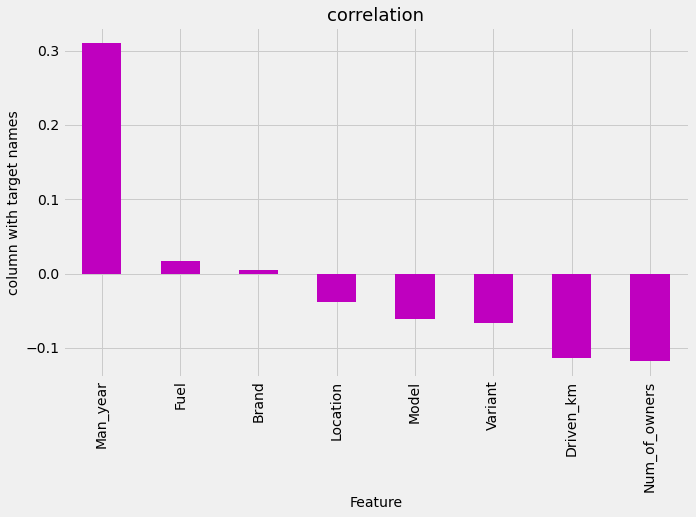

In [64]:
plt.figure(figsize=(10,6))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Principle Component Analysis

In [65]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [66]:
pca=PCA()
pca.fit_transform(scaled_value)

array([[-1.40768278,  0.25715542, -0.09329112, ..., -0.01925296,
         0.18321414,  0.10432375],
       [-0.78640042, -0.02792904,  0.64645655, ...,  0.63457755,
         0.9352834 , -0.05118457],
       [ 1.47509625,  0.39502141,  1.59134776, ...,  0.71665767,
         0.06730006,  0.22087587],
       ...,
       [-0.52773505, -1.00671653,  0.35316081, ...,  0.55717801,
        -0.14095574, -0.0204928 ],
       [-0.17390498, -1.69095278,  0.66814058, ...,  0.08758821,
        -0.15340308,  0.60460637],
       [ 0.52074368, -0.15222886,  0.19980152, ...,  1.25039696,
        -0.08639183,  0.62213056]])

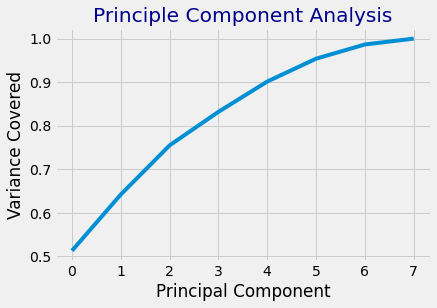

In [67]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('Principle Component Analysis',color='darkblue')
plt.show()

# Model Building:

In [68]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

In [69]:
x_test, y_test ,x_train, y_train = train_test_split(x,y,test_size=0.20,random_state=0)

In [70]:
def maxr2_score(clf,x,y):   
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    
    
    return final_r
        
        

# Linear Regression

max r2 score corresponding to 62 is 28.745985619608973
cross validation score -82.39301720785441
Standard Deviation 202.43855695226617
Training accuracy 25.93149693061213
Test Accuracy 20.89259957033047
MAE 578627.791847984
MSE 957366931870.4653
RMSE 978451.2925386042




62

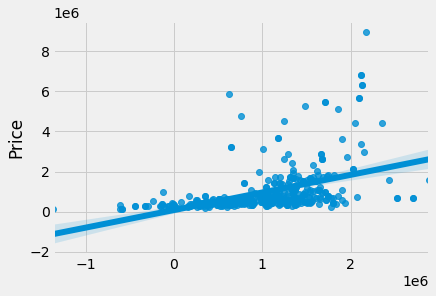

In [71]:
lr=LinearRegression()
maxr2_score(lr,x,y)

# Lasso

max r2 score corresponding to 62 is 28.745977996262983
cross validation score -82.39261598414984
Standard Deviation 202.43772791561082
Training accuracy 25.931496929860476
Test Accuracy 20.89265641378184
MAE 578627.2064155311
MSE 957366243944.4264
RMSE 978450.9410003275




62

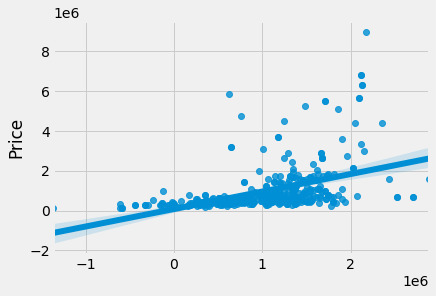

In [72]:
lasso=Lasso()
maxr2_score(lasso,x,y)

# Ridge

max r2 score corresponding to 62 is 28.74387556807303
cross validation score -82.1829559190029
Standard Deviation 202.0067927716289
Training accuracy 25.931411483677692
Test Accuracy 20.910964491747507
MAE 578423.7565854355
MSE 957144677462.2104
RMSE 978337.7113564673




62

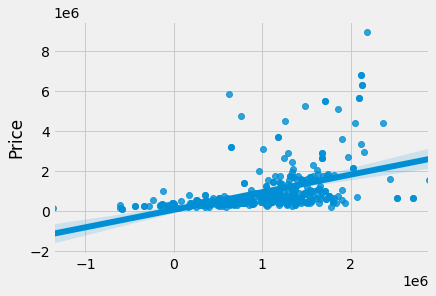

In [73]:
rigde=Ridge()
maxr2_score(rigde,x,y)

# Decision Tree Regressor

max r2 score corresponding to 66 is 95.13711859503591
cross validation score 58.28467898006063
Standard Deviation 47.42613623986546
Training accuracy 99.99997606401357
Test Accuracy 86.13367537185343
MAE 100478.13620071684
MSE 167811868339.30707
RMSE 409648.4692261245




66

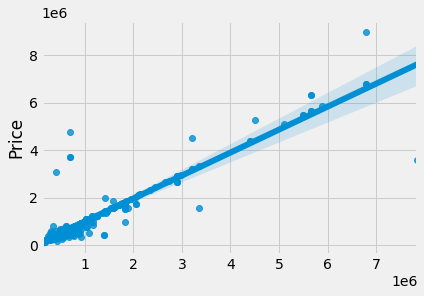

In [74]:
dt2=DecisionTreeRegressor()
maxr2_score(dt2,x,y)

# KNeighbors Regressor

max r2 score corresponding to 89 is 45.733713398782804
cross validation score -104.7218772597017
Standard Deviation 270.96404983597716
Training accuracy 60.382753363438766
Test Accuracy 25.98152611056387
MAE 494553.5483870968
MSE 895780152860.2151
RMSE 946456.6302056398




89

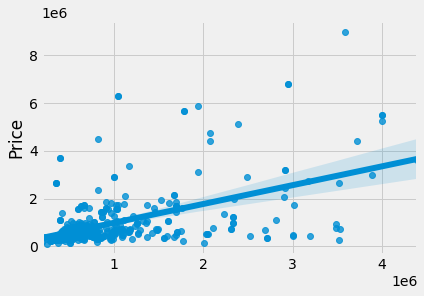

In [75]:
knn=KNeighborsRegressor()
maxr2_score(knn,x,y)

# Random Forest Regressor

max r2 score corresponding to 66 is 93.5681220021447
cross validation score 63.318401135685995
Standard Deviation 41.05747609201816
Training accuracy 98.32424784535505
Test Accuracy 92.1702019499407
MAE 119789.01792114694
MSE 94757123804.30107
RMSE 307826.4507872919




66

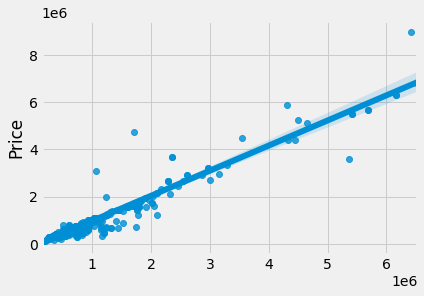

In [76]:
rf=RandomForestRegressor()
maxr2_score(rf,x,y)

# AdaBoost Regressor

max r2 score corresponding to 82 is 22.230534519643708
cross validation score -306.8750818621323
Standard Deviation 786.2343351168048
Training accuracy -0.4672140209445397
Test Accuracy -9.363599194432549
MAE 837238.0996238416
MSE 1323530957285.9714
RMSE 1150448.1549752564




82

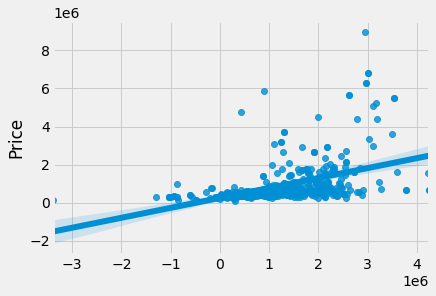

In [77]:
Adb=AdaBoostRegressor(base_estimator=lasso)
maxr2_score(Adb,x,y)

# Gradient Boosting Regressor

max r2 score corresponding to 96 is 93.23332129143138
cross validation score 72.31573448190984
Standard Deviation 21.703634924090746
Training accuracy 94.75019681881842
Test Accuracy 89.65674151781737
MAE 174815.7214129283
MSE 125175313369.49947
RMSE 353801.23426791414




96

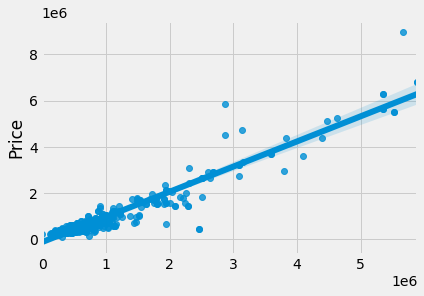

In [78]:
gnb=GradientBoostingRegressor()
maxr2_score(gnb,x,y)

# Hyperparameter Tuning

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
gnb=GradientBoostingRegressor(n_estimators=200,max_depth=5)
gnb.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=200)

 Mean Absolute Error (MAE) : 6120963.272178695
Mean Squared Error (MSE) : 1939990010333.29
Root Mean Squared Error : 13928352.416324373
R_2 score: 98.3788288005674


<AxesSubplot:ylabel='Price'>

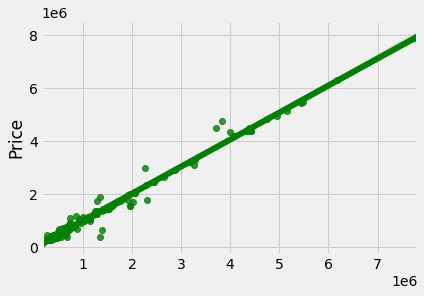

In [80]:
gnb=GradientBoostingRegressor(n_estimators=200,max_depth=5)
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(y_pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(y_pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_pred,y_test))*100)
print('R_2 score:',r2_score(y_pred,y_test)*100)
## best fit line
sns.regplot(y_pred,y_test,color='g')

Found GradientBoosting Regressor as the best to hypertune the model.

# Save the Model

In [81]:
import joblib
joblib.dump(gnb,'car_price.pkl')

['car_price.pkl']

In [82]:
loaded_model=joblib.load('car_price.pkl')
prediction=loaded_model.predict(x_test)

In [83]:
prediction

array([ 351825.7071837 ,  499430.65617139, 1685049.0904334 ,
       1815294.22009411,  331804.62639886,  423039.64477636,
       4411775.1055583 ,  556243.18079902, 1548469.36551806,
        187957.53601556,  473506.65138216,  563025.7833089 ,
        594229.53701659,  921844.44289696, 1916754.15127256,
        673710.04480864, 1385298.95801031,  711050.54662035,
        334656.97383033,  558220.87041363,  673710.04480864,
        673710.04480864,  673710.04480864,  655967.35977546,
        705545.56564761,  341491.33937845,  602398.53844453,
        484981.18278938, 1954423.13919263,  395154.33565685,
        242386.45397566,  799374.69595883,  350878.15864482,
        673710.04480864,  413251.48153879,  274044.50660218,
       1276281.41438813,  366824.99238657,  517956.73106625,
        730804.12010869, 3194557.39115582, 1685049.0904334 ,
        762630.76338545, 2012503.91842448, 7813080.92703086,
        154245.66972996,  673710.04480864, 1022440.75377316,
        316107.49331809,